# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

### **Import Libraries and Settings**

In [518]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [519]:
df = pd.read_csv('marketing_campaign_data.csv')

# **Task 1 : Conversion Rate Analysis Based on Income, Spending and Age**

## Data Understanding & Initial Transformation

In [520]:
df.sample(10)

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  \
1083        1083  9523        1982        S1    Bertunangan  40479000.0   
1480        1480  2849        1979        S1         Lajang  60474000.0   
1838        1838  9847        1955        D3        Menikah  62972000.0   
406          406  3645        1972        S3         Lajang  27213000.0   
1476        1476   217        1956        S2         Lajang  64857000.0   
2082        2082  6497        1960        S1        Menikah  51651000.0   
1344        1344  5181        1982       SMA         Lajang  24367000.0   
1703        1703  1958        1973        S3    Bertunangan  55012000.0   
1475        1475  3697        1954        S1    Bertunangan  39898000.0   
678          678  8779        1985        D3        Menikah  36145000.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntCoke  MntFruits  \
1083        1         0  17-08-2013       95     5000          0   
1480        0         1  01-04-2013       25   265000     199000   
1838        0         1  03-08-2012       39   313000      15000   
406         1         0  30-08-2012       19    19000       3000   
1476        0         0  23-11-2012       78   556000      14000   
2082        0         1  07-11-2012       32   293000       6000   
1344        1         0  20-03-2013       58     2000       4000   
1703        0         1  21-03-2014       85   582000          0   
1475        0         1  12-02-2013       20    69000       8000   
678         1         0  16-06-2013       13    56000       4000   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
1083             8000             2000                 0             0   
1480           303000           234000              9000        170000   
1838            47000            20000                 0        192000   
406             26000            10000              9000          3000   
1476           717000           210000                 0         43000   
2082            23000            13000              6000         92000   
1344             2000                0             11000          5000   
1703            65000                0                 0         13000   
1475            26000            12000              7000         12000   
678             76000            17000              1000         18000   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1083                  1                0                    0   
1480                  7               10                    2   
1838                  2                7                    4   
406                   3                2                    0   
1476                  1                7                    5   
2082                  4                6                    2   
1344                  1                1                    0   
1703                  6                8                    2   
1475                  2                3                    0   
678                   4                4                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1083                  3                  4             0             0   
1480                 12                  7             0             0   
1838                  3                  6             0             0   
406                   4                  8             0             0   
1476                 10                  4             0             0   
2082                  5                  8             0             0   
1344                  2                  9             0             0   
1703                  9                  5             0             0   
1475                  4                  7             0             0   
678                   3                  9             1             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
1083      

In [521]:
# Initial transformation
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sort_index(inplace=True)

### **Data Information**

In [522]:
df.shape

(2240, 29)

- The dataset have 2240 rows and 29 columns

In [523]:
# Check data information
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=list_item, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, Unique Sample'.split(","))
desc_df

Feature  Data Type   Null Values   Null Percentage  \
0                    ID      int64             0              0.00   
1            Year_Birth      int64             0              0.00   
2             Education     object             0              0.00   
3        Marital_Status     object             0              0.00   
4                Income    float64            24              1.07   
5               Kidhome      int64             0              0.00   
6              Teenhome      int64             0              0.00   
7           Dt_Customer     object             0              0.00   
8               Recency      int64             0              0.00   
9               MntCoke      int64             0              0.00   
10            MntFruits      int64             0              0.00   
11      MntMeatProducts      int64             0              0.00   
12      MntFishProducts      int64             0              0.00   
13     MntSweetProducts      int64             0              0.00   
14         MntGoldProds      int64             0              0.00   
15    NumDealsPurchases      int64             0              0.00   
16      NumWebPurchases      int64             0              0.00   
17  NumCatalogPurchases      int64             0              0.00   
18    NumStorePurchases      int64             0              0.00   
19    NumWebVisitsMonth      int64             0              0.00   
20         AcceptedCmp3      int64             0              0.00   
21         AcceptedCmp4      int64             0              0.00   
22         AcceptedCmp5      int64             0              0.00   
23         AcceptedCmp1      int64             0              0.00   
24         AcceptedCmp2      int64             0              0.00   
25             Complain      int64             0              0.00   
26        Z_CostContact      int64             0              0.00   
27            Z_Revenue      int64             0              0.00   
28             Response      int64             0              0.00   

     Duplicated Values   Unique Values  \
0                    0            2240   
1                    0              59   
2                    0               5   
3                    0               6   
4                    0            1974   
5                    0               3   
6                    0               3   
7                    0             663   
8                    0             100   
9                    0             776   
10                   0             158   
11                   0             558   
12                   0             182   
13                   0             177   
14                   0             213   
15                   0              15   
16                   0              15   
17                   0              14   
18                   0              14   
19                   0              16   
20                   0               2   
21                   0               2   
22                   0               2   
23                   0               2   
24                   0               2   
25                   0               2   
26                   0               1   
27                   0               1   
28                   0               2   

                                                   Unique Sample  
0                                 [5524, 2174, 4141, 6182, 5324]  
1                                 [1957, 1954, 1965, 1984, 1981]  
2                                          [S1, S3, S2, SMA, D3]  
3                   [Lajang, Bertunangan, Menikah, Cerai, Janda]  
4   [58138000.0, 46344000.0, 71613000.0, 26646000.0, 58293000.0]  
5                                                      [0, 1, 2]  
6                                                      [0, 1, 2]  
7   [04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014]  
8                                           [58, 38

**Feature Descriptions**

- `ID`: Unique identifier for each customer
- `Year_Birth`: Customer's year of birth
- `Complain`: 1 if the customer complained in the last 2 years
- `Dt_Customer`: Date of customer's registration with the company (joining date as a member)
- `Education`: Customer's level of education
- `Marital_Status`: Customer's marital status
- `Kidhome`: Number of small children in the customer's household
- `Teenhome`: Number of teenagers in the customer's household
- `Income`: Customer's household income per year
- `MntFishProducts`: Amount spent on fish products in the last 2 years
- `MntMeatProducts`: Amount spent on meat products in the last 2 years
- `MntFruits`: Amount spent on fruit products in the last 2 years
- `MntSweetProducts`: Amount spent on sweet products in the last 2 years
- `MntWines`: Amount spent on wine products in the last 2 years
- `MntGoldProds`: Amount spent on gold products in the last 2 years
- `NumDealsPurchases`: Number of purchases made with a discount
- `NumCatalogPurchases`: Number of purchases made using a catalog (buying items to be shipped via mail)
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebPurchases`: Number of purchases made through the company's website
- `NumWebVisitsMonth`: Number of visits to the company's website in the last month
- `Recency`: Number of days since the customer's last purchase
- `Response`: 1 if the customer responded to the offer in the last campaign, 0 if not

- Other than `Dt_Customer` that we will convert to datetime, every features have the correct data types.

In [524]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [525]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

- `Income` column have a small percentage missing values, we will need to handle that with imputation based on the distribution.

<Axes: xlabel='Income', ylabel='Count'>

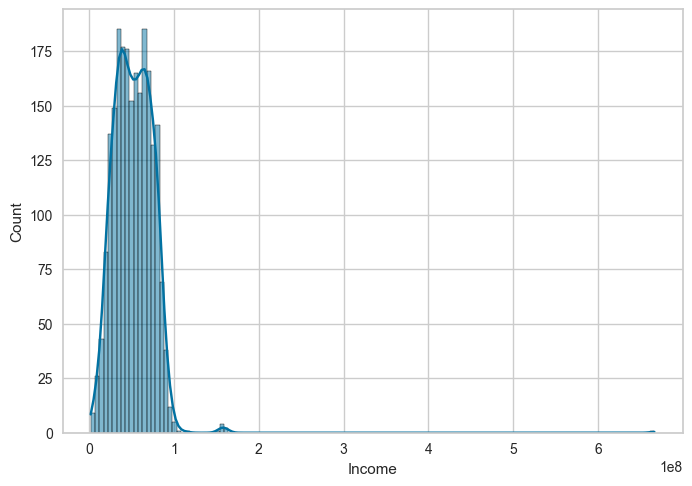

In [526]:
# Checking income distribution for imputation method
sns.histplot(data=df, x='Income', kde=True)

Since the distribution is positive skewed then we will impute the missing values with median that is robust to outliers.

In [527]:
df['Income'] = df['Income'].fillna(df['Income'].median())

### Columns Grouping Based on Data Type

In [528]:
# Check dataframe values
df.sample(10)

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
1354   2407        1982        S1        Menikah  69109000.0        0   
181    3559        1988        D3        Menikah  16248000.0        1   
1718  10640        1974        S1    Bertunangan  44392000.0        1   
998    1212        1973        S1        Menikah  52845000.0        1   
1221   1176        1973        S1        Menikah  26228000.0        1   
802     236        1951        S1        Menikah  34838000.0        1   
2170   9362        1965        S1         Lajang  69263000.0        0   
448    2541        1976        S1        Menikah  24027000.0        1   
1344   5181        1982       SMA         Lajang  24367000.0        1   
943    5386        1953        S1    Bertunangan  94384000.0        0   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
1354         0  2012-11-09       10   823000      25000           459000   
181          0  2014-05-10       77    12000      11000            10000   
1718         1  2013-09-05       71    87000       5000            71000   
998          0  2013-08-13        7   384000      25000           292000   
1221         0  2013-09-22       50     2000       6000             4000   
802          1  2013-01-19       62    28000      23000            29000   
2170         1  2014-03-05       14   492000       5000            32000   
448          0  2013-06-09        7    14000       7000            11000   
1344         0  2013-03-20       58     2000       4000             2000   
943          0  2013-03-04       62  1111000      24000           790000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1354           124000             29000         95000                  1   
181              3000             12000          9000                  3   
1718             7000             12000         29000                  5   
998            130000             41000         64000                  3   
1221             3000              1000          9000                  1   
802             29000             14000         47000                  3   
2170            13000              5000         21000                  1   
448             11000                 0          5000                  2   
1344                0             11000          5000                  1   
943            160000             45000        172000                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1354                6                    6                  7   
181                 2                    1                  3   
1718                4                    1                  4   
998                 8                    8                  6   
1221                1                    0                  2   
802                 2                    1                  4   
2170                9                    1                  7   
448                 2                    0                  3   
1344                1                    0                  2   
943                 5                    8                  5   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1354                  4             0             0             1   
181                   6             0             0             0   
1718                  7             0             0             0   
998                   6             1             0             0   
1221                  8             0             0             0   
802                   6             0             0             0   
2170                  6             0             1             0   
448                   8             0             0             0   
1344                  9             0             0             0   
943                   2             0             1             1   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostConta

In [529]:
# # Another way of checking unique values (before grouping based on data types)
# for x in df.columns:
#     unique_values_check = list(df[x].unique())
#     unique_values_check.sort()

#     print(f"{x}")
#     print(f"{df[x].unique()}")
#     print()

#     # if len(unique_values_check) >= 10:
#     #     unique_values_check = unique_values_check[:10] + ['.....']
#     #     print(unique_values_check)
#     # else:
#     #     print(unique_values_check)
#     # print()

- Categorical columns (10 columns): 
    - `ID` : nominal
    - `Education` : ordinal
    - `Marital_Status` : nominal
    - `AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Complain, Response` : nominal (Binary 0 & 1)

- Numerical/Continuous columns (18 columns)
    - `Year_Birth, Income, Kidhome, Teenhome, 
    Recency, MntCoke, MntFruits, MntMeatProducts, 
    MntFishProducts, MntSweetProducts, MntGoldProds, 
    NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, 
    NumStorePurchases, NumWebVisitsMonth, Z_CostContact, Z_Revenue`

- Date column (1 column) : `Dt_Customer`

In [530]:
# Grouping columns based on data types
cats_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

nums_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

date_cols = ['Dt_Customer']

In [531]:
# Checking every unique values in categorical columns
for col in cats_cols :
    print()
    print(f"{col} : {df[col].unique()}")


ID : [5524 2174 4141 ... 7270 8235 9405]

Education : ['S1' 'S3' 'S2' 'SMA' 'D3']

Marital_Status : ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']

AcceptedCmp1 : [0 1]

AcceptedCmp2 : [0 1]

AcceptedCmp3 : [0 1]

AcceptedCmp4 : [0 1]

AcceptedCmp5 : [0 1]

Complain : [0 1]

Response : [1 0]


In [532]:
# Checking every unique values in numerical columns
for col in nums_cols :
    print()
    print(f"{col} : {df[col].unique()}")


Year_Birth : [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]

Income : [58138000. 46344000. 71613000. ... 56981000. 69245000. 52869000.]

Kidhome : [0 1 2]

Teenhome : [0 1 2]

Recency : [58 38 26 94 16 34 32 19 68 11 59 82 53 23 51 20 91 86 41 42 63  0 69 89
  4 96 56 31  8 55 37 76 99  3 88 80 72 24 92 39 29  2 54 57 30 12 18 75
 90  1 25 40  9 87  5 95 48 70 79 45 84 44 43 35 15 17 46 27 74 85 65 13
 83 10 21 61 73 47 36 49 28 64 98 78 77 81 14 52 93 50 60 66 97 62  6 33
 67 22 71  7]

MntCoke : [ 635000   11000  426000  173000  520000  235000   76000   14000   28000
    5000    6000  194000  233000    3000 1006000   53000   84000 1012000
    4000   86000    1000  867000  384000  270000   36000  684000    8000
  112000  110000   9600

## Handling Outliers

In [533]:
len(df[nums_cols].columns)

18

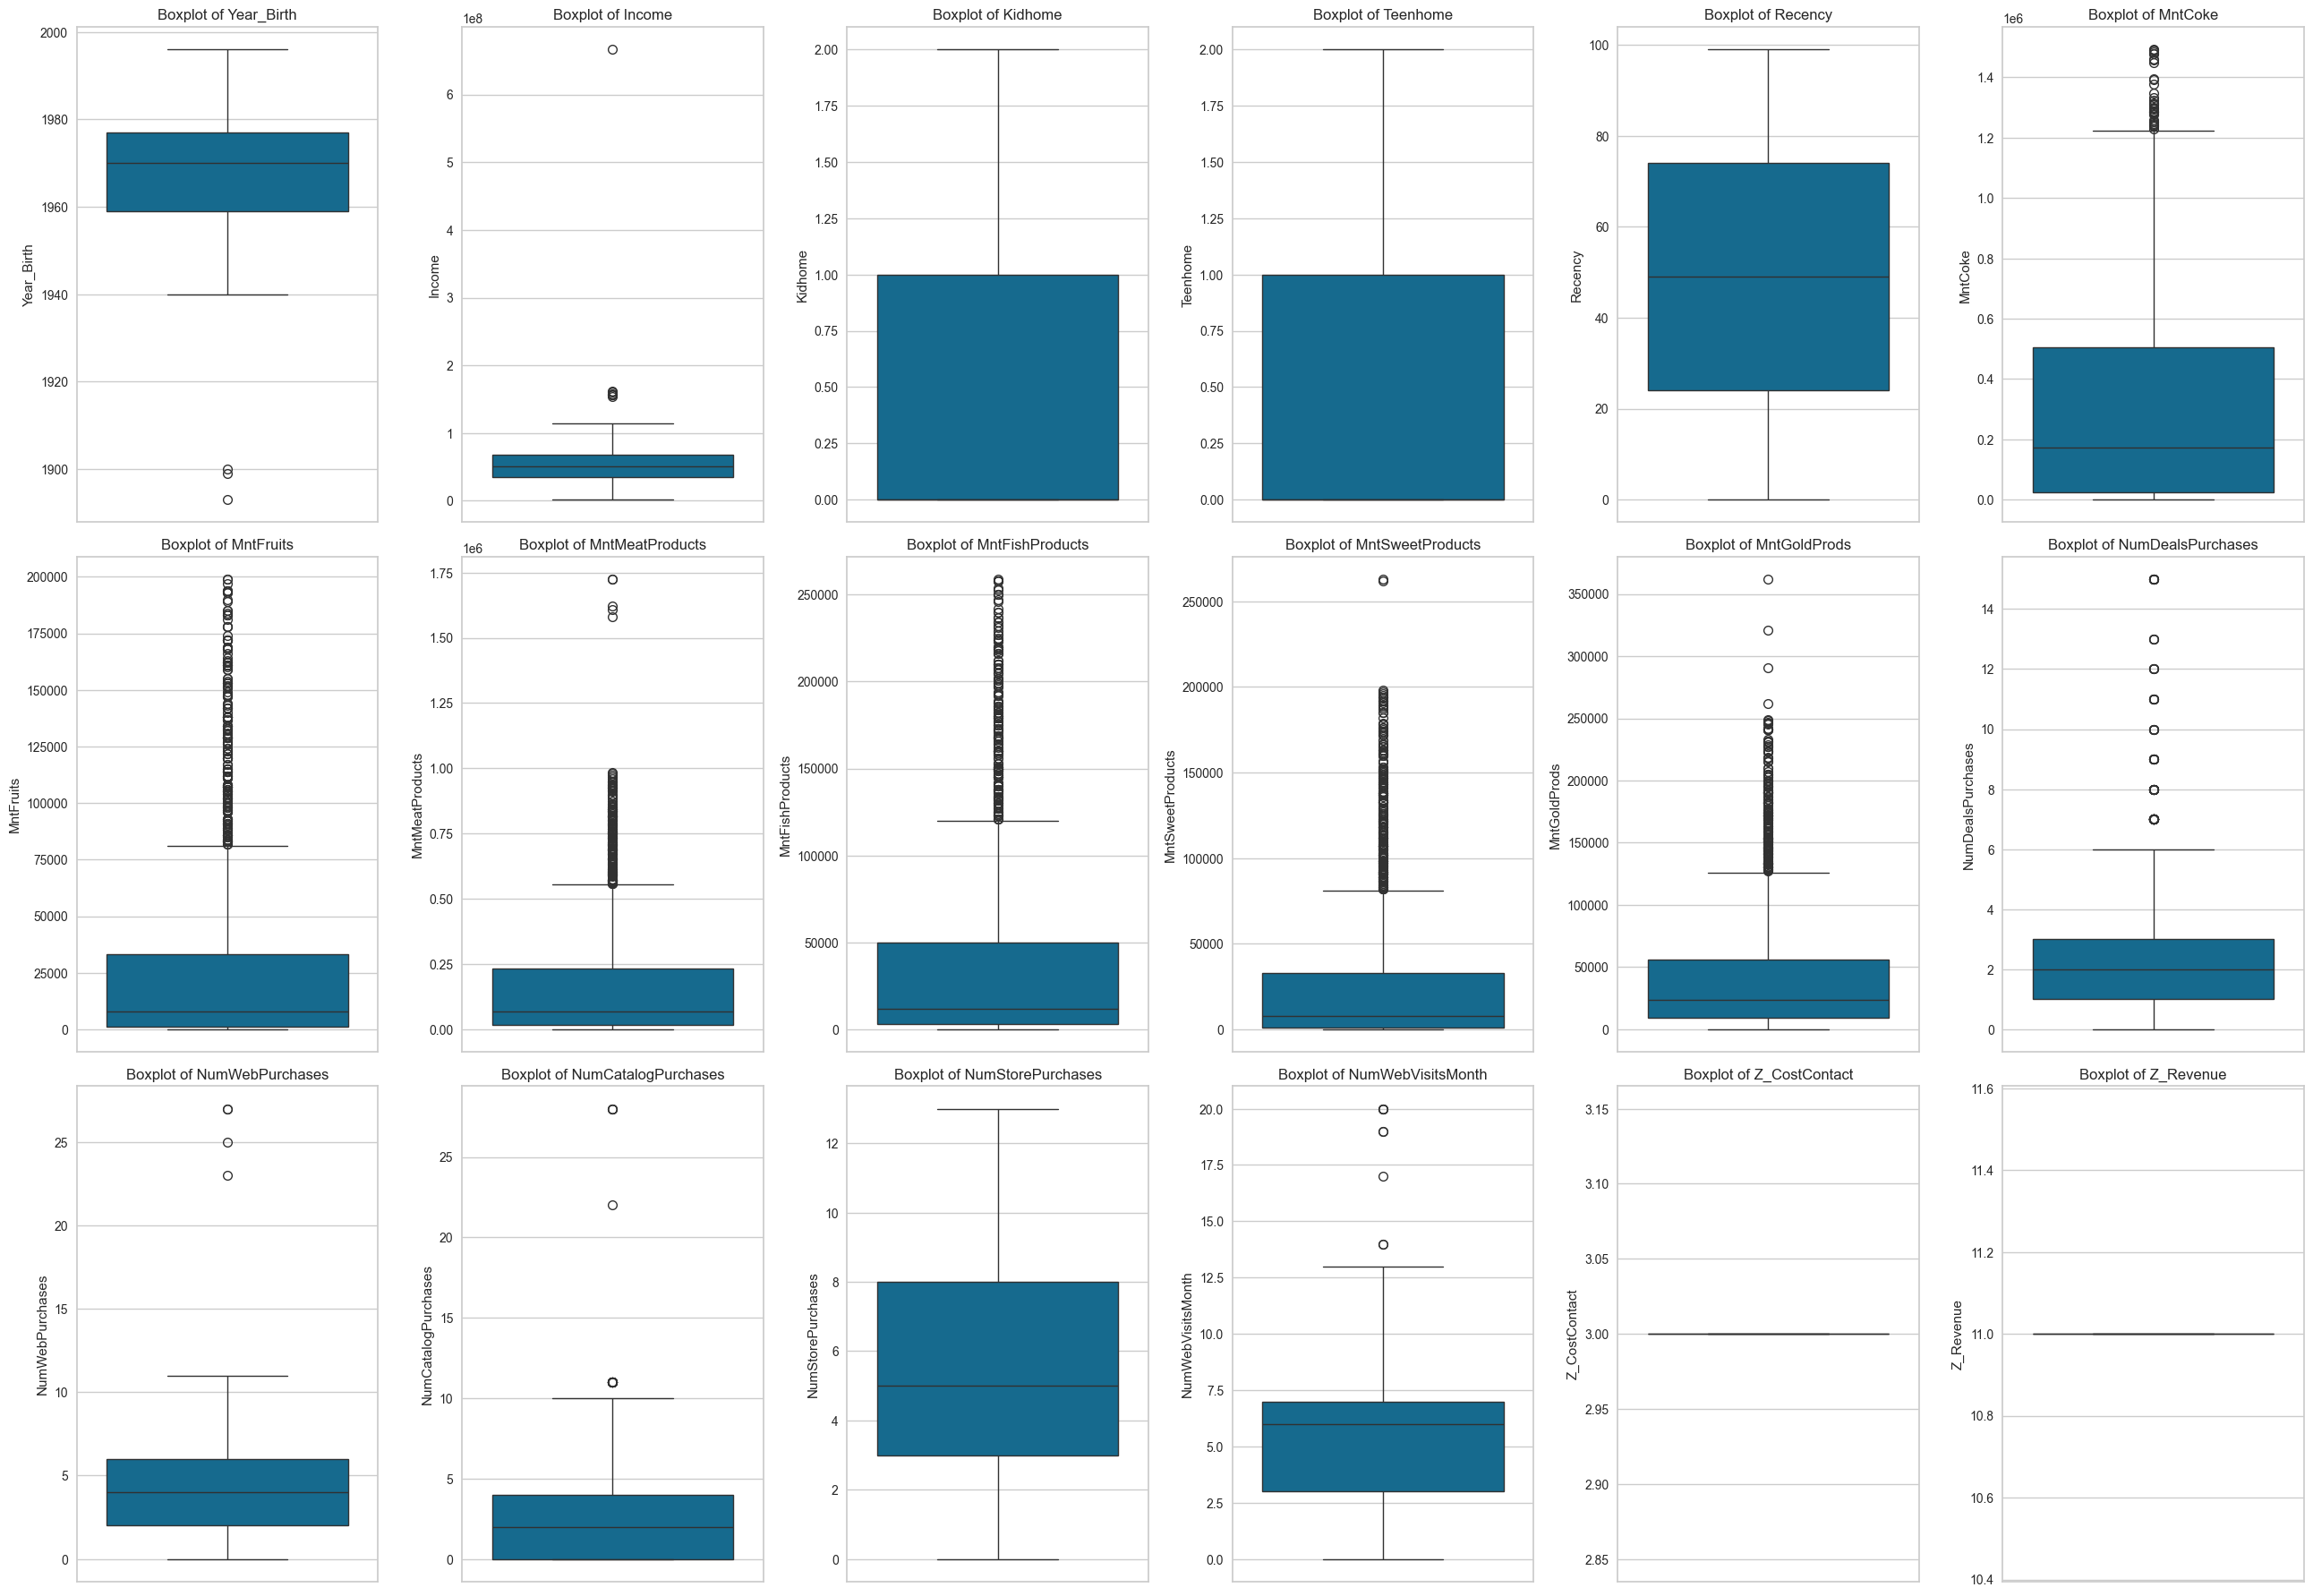

In [534]:
# Boxplot
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26,18))
ax = ax.flatten()

for i in range (len(nums_cols)) :
    sns.boxplot(data=df, ax=ax[i], y=nums_cols[i], orient='v')
    ax[i].set_title(f'Boxplot of {nums_cols[i]}')

plt.tight_layout()
plt.show()

In [535]:
# Outlier detection for original data

print(f'')
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data':outlier,
    'Non-Outlier Data':no_outlier
})

check_outliers


Amount of Rows: 2240
Amount of Outlier Rows : 706
Amount of Non-Outlier Rows : 1534
Percentage of Outliers : 31.52



Column Name  Outlier Exist  Lower Limit  Upper Limit  \
0            Year_Birth           True       1932.0       2004.0   
1                Income           True  -13587750.0  117416250.0   
2               Kidhome          False         -1.5          2.5   
3              Teenhome          False         -1.5          2.5   
4               Recency          False        -51.0        149.0   
5               MntCoke           True    -697000.0    1225000.0   
6             MntFruits           True     -47000.0      81000.0   
7       MntMeatProducts           True    -308000.0     556000.0   
8       MntFishProducts           True     -67500.0     120500.0   
9      MntSweetProducts           True     -47000.0      81000.0   
10         MntGoldProds           True     -61500.0     126500.0   
11    NumDealsPurchases           True         -2.0          6.0   
12      NumWebPurchases           True         -4.0         12.0   
13  NumCatalogPurchases           True         -6.0         10.0   
14    NumStorePurchases          False         -4.5         15.5   
15    NumWebVisitsMonth           True         -3.0         13.0   
16        Z_CostContact          False          3.0          3.0   
17            Z_Revenue          False         11.0         11.0   

    Outlier Data  Non-Outlier Data  
0              3              2237  
1              8              2232  
2              0              2240  
3              0              2240  
4              0              2240  
5             35              2205  
6            227              2013  
7            175              2065  
8            223              2017  
9            248              1992  
10           207              2033  
11            86              2154  
12             4              2236  
13            23              2217  
14             0              2240  
15             8              2232  
16             0              2240  
17             0              2240

**Major Findings:**

There are outliers in the following columns: Year_Birth, Income, MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, and NumWebVisitMonth.

- In the `Year_Birth` column, outliers are below 1932.
- In the `Income` column, outliers are above 117M.
- In the `MntCoke` column, outliers are above 1.2M.
- In the `MntFruits` column, outliers are around 81k.
- In the `MntMeatProducts` column, the farthest outlier is around 1.75M.
- In the `MntFishProducts` column, outliers are around 125k to above 250k.
- In the `MntSweetProducts` column, the farthest outlier is around 250k.
- In the `MntGoldProds` column, the farthest outlier is around 350k.
- In the `NumDealsPurchases` column, the farthest outlier is at 15.
- In the `NumWebPurchases` column, outliers are around 25.
- In the `NumCatalogPurchases` column, the farthest outlier is above 25.
- In the `NumWebVisitsMonth` column, the farthest outlier is at 20.

**Steps to be taken in this initial data pre-Processing:**
- Apply `log transformation` for feature scaling and handling outliers, as this transformation minimizes outliers and potentially helps to obtain a bell-shaped/normal distribution. This choice is maybe appropriate due to the limited data available that is only 2240 rows, and it avoids the need to delete data points.

- Alternatively, cleaning the data by removing outliers based on IQR or Z-score, but it will reduce the amount of available data.

In this case, since we want to keep the data as it is because transforming the whole values in many columns will result in changing the conclusion of our data, so the choice will be removing outliers with Z-score method **but not in all of the columns**, only several columns that have really extreme outliers like `Year_Birth`, `Income`, `MntMeatProducts`, `MntSweetProducts`, `NumWebPurchases`, `NumCatalogPurchases`.

In [536]:
# Outlier handling and create outliers-filtered new dataframe

print(f'Rows before removing outliers: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['Year_Birth','Income', 'MntMeatProducts', 'MntSweetProducts', 'NumWebPurchases', 'NumCatalogPurchases']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries
    
df_filtered_outliers = df[filtered_entries]

print(f'Rows after removing outliers: {len(df_filtered_outliers)}')

df_filtered_outliers = df[filtered_entries]
df_filtered_outliers

Rows before removing outliers: 2240
Rows after removing outliers: 1861


ID  Year_Birth Education Marital_Status      Income  Kidhome  \
1     2174        1954        S1         Lajang  46344000.0        1   
2     4141        1965        S1    Bertunangan  71613000.0        0   
3     6182        1984        S1    Bertunangan  26646000.0        1   
4     5324        1981        S3        Menikah  58293000.0        1   
5     7446        1967        S2    Bertunangan  62513000.0        0   
...    ...         ...       ...            ...         ...      ...   
2234  8372        1974        S1        Menikah  34421000.0        1   
2236  4001        1946        S3    Bertunangan  64014000.0        2   
2237  7270        1981        S1          Cerai  56981000.0        0   
2238  8235        1956        S2    Bertunangan  69245000.0        0   
2239  9405        1954        S3        Menikah  52869000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
1            1  2014-03-08       38    11000       1000             6000   
2            0  2013-08-21       26   426000      49000           127000   
3            0  2014-02-10       26    11000       4000            20000   
4            0  2014-01-19       94   173000      43000           118000   
5            1  2013-09-09       16   520000      42000            98000   
...        ...         ...      ...      ...        ...              ...   
2234         0  2013-07-01       81     3000       3000             7000   
2236         1  2014-06-10       56   406000          0            30000   
2237         0  2014-01-25       91   908000      48000           217000   
2238         1  2014-01-24        8   428000      30000           214000   
2239         1  2012-10-15       40    84000       3000            61000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                2000              1000          6000                  2   
2              111000             21000         42000                  1   
3               10000              3000          5000                  2   
4               46000             27000         15000                  5   
5                   0             42000         14000                  2   
...               ...               ...           ...                ...   
2234             6000              2000          9000                  1   
2236                0                 0          8000                  7   
2237            32000             12000         24000                  1   
2238            80000             30000         61000                  2   
2239             2000              1000         21000                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
5                   6                    4                 10   
...               ...                  ...                ...   
2234                1                    0                  2   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
5                     6             0             0             0   
...                 ...           ...           ...           ...   
2234                  7             0             0  

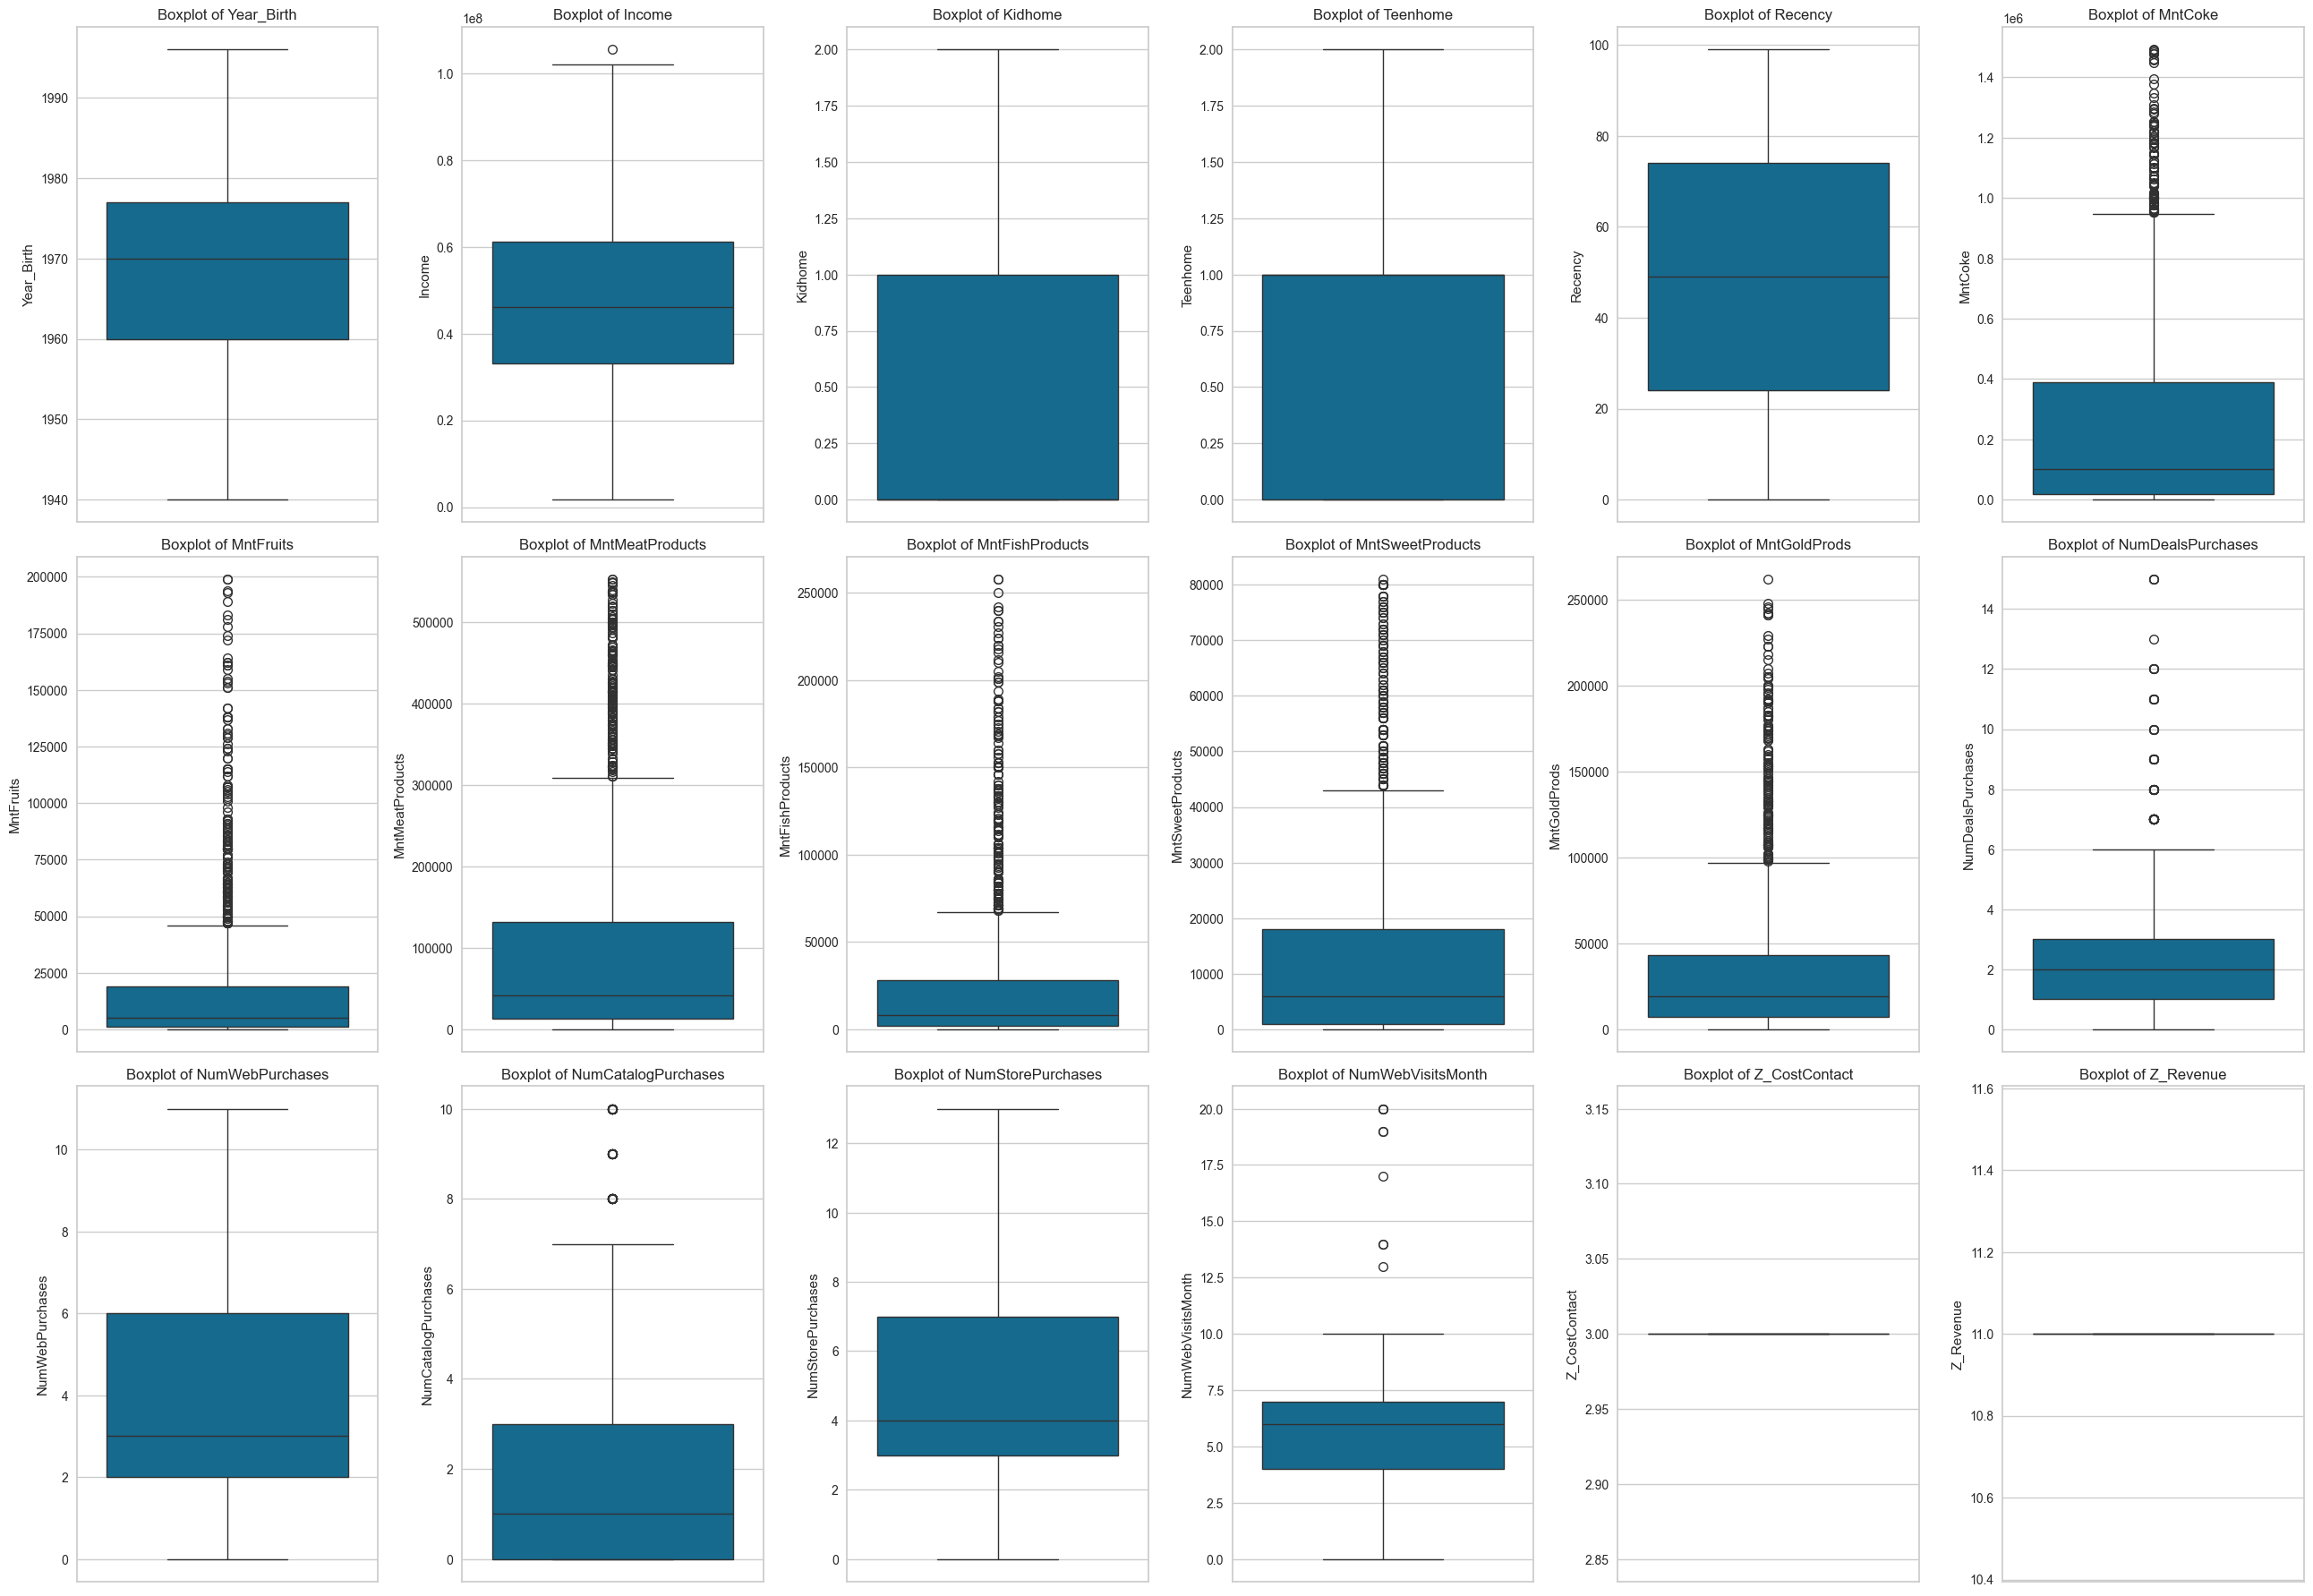

In [537]:
# Check data after filtered
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26,18))
ax = ax.flatten()

for i in range (len(nums_cols)) :
    sns.boxplot(data=df_filtered_outliers, ax=ax[i], y=nums_cols[i], orient='v')
    ax[i].set_title(f'Boxplot of {nums_cols[i]}')

plt.tight_layout()
plt.show()

## Feature Engineering

### Age Column

The `Age` column is created by calculating the age of each customer based on their birth year and current time.

In [538]:
# Age feature engineering

"""
We don't really have the year information in the data for this purpose, so we will just use the year now
"""
# from datetime import datetime
# year_data = datetime.now().year()

year_data = 2024
df_filtered_outliers['Age'] = year_data - df_filtered_outliers['Year_Birth']

### Age Group Column

The `Age_Group` column is created by grouping the `age` column. But first we need check the distribution of age to help with the grouping range.

<Axes: xlabel='Age', ylabel='Count'>

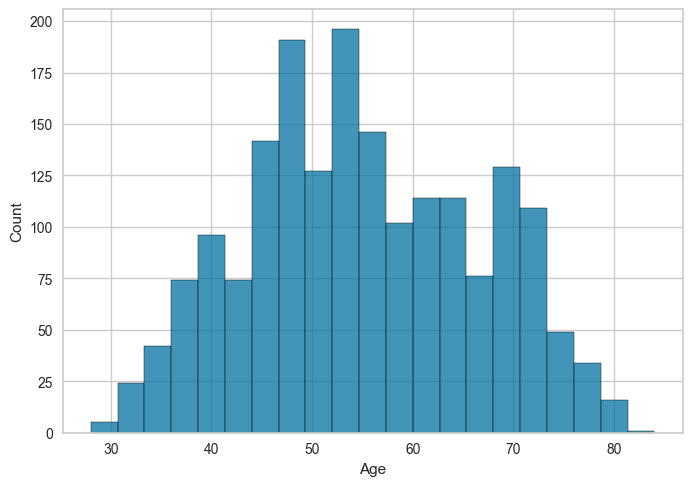

In [539]:
sns.histplot(data=df_filtered_outliers, x='Age')

In [540]:
# Age grouping

def age_group(x):
    if x >= 60:
        return 'Senior Adult'
    elif x >= 40:
        return 'Middle Adult'
    else:
        return 'Young Adult'

df_filtered_outliers['Age_Group'] = df_filtered_outliers['Age'].apply(age_group)

In [541]:
df_filtered_outliers['Age_Group'].value_counts()

Age_Group
Middle Adult    1045
Senior Adult     642
Young Adult      174
Name: count, dtype: int64

### Num_Child Column

The `Num_Child` column is created by summing the values of Kidhome and Teenhome, representing the total number of dependents or children a customer has.

In [542]:
# Number of child the customer have feature engineering

df_filtered_outliers['Num_Child'] = df_filtered_outliers['Kidhome'] + df_filtered_outliers['Teenhome']

In [543]:
df_filtered_outliers['Num_Child'].value_counts()

Num_Child
1    1037
2     410
0     362
3      52
Name: count, dtype: int64

### Membership_Duration Column

The `Membership_Duration` column represents duration of customer membership in year.

In [544]:
df_filtered_outliers['Membership_Duration'] = 2024 - df_filtered_outliers['Dt_Customer'].dt.year

In [545]:
df_filtered_outliers['Membership_Duration'].value_counts()

Membership_Duration
11    989
10    475
12    397
Name: count, dtype: int64

### Total_Acc_Camp Column

The `Total_Cmp` column represents the total number of times each customer responded to the 5 campaigns that were conducted (AcceptedCmp 1 - 5).

In [546]:
df_filtered_outliers['Total_Acc_Camp'] = df_filtered_outliers['AcceptedCmp1'].astype("int64") + df_filtered_outliers['AcceptedCmp2'].astype("int64") \
                                    + df_filtered_outliers['AcceptedCmp3'].astype("int64") + df_filtered_outliers['AcceptedCmp4'].astype("int64") \
                                    + df_filtered_outliers['AcceptedCmp5'].astype("int64")

In [547]:
df_filtered_outliers['Total_Acc_Camp'].value_counts()

Total_Acc_Camp
0    1539
1     245
2      55
3      15
4       7
Name: count, dtype: int64

### Total_Spending Column

The `Total_Spending` column represents the total purchase amount of each customer across all products.

In [548]:
df_filtered_outliers['Total_Spending'] = df_filtered_outliers['MntCoke']+ df_filtered_outliers['MntFruits'] + df_filtered_outliers['MntMeatProducts'] \
                                        + df_filtered_outliers['MntFishProducts'] + df_filtered_outliers['MntSweetProducts'] + df_filtered_outliers['MntGoldProds']

### Total_Purchases Column

The `Total_Purchases` column represents the total purchase amount of each customer across all types of transactions.

In [549]:
df_filtered_outliers['Total_Purchases'] = df_filtered_outliers['NumDealsPurchases'] + df_filtered_outliers['NumWebPurchases'] \
                                        + df_filtered_outliers['NumCatalogPurchases'] + df_filtered_outliers['NumStorePurchases']

### CVR (Conversion Rate) Column

The `CVR` column is calculated as the ratio of `Total Purchases` to the `Number of Web Visits` for each customer. It represents the percentage of website visitors who made purchases.

In [550]:
df_filtered_outliers['CVR'] = np.round(df_filtered_outliers['Total_Purchases'] / df_filtered_outliers['NumWebVisitsMonth'], 2)
df_filtered_outliers['CVR'].fillna(0, inplace=True)
df_filtered_outliers['CVR'].replace([np.inf, -np.inf], 0, inplace=True)

In [551]:
?df.plot

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x000001D6B5DD2540>
File:           c:\users\cikal merdeka\appdata\local\programs\python\python312\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : s

<Axes: title={'center': 'Distribution of CVR'}, ylabel='Density'>

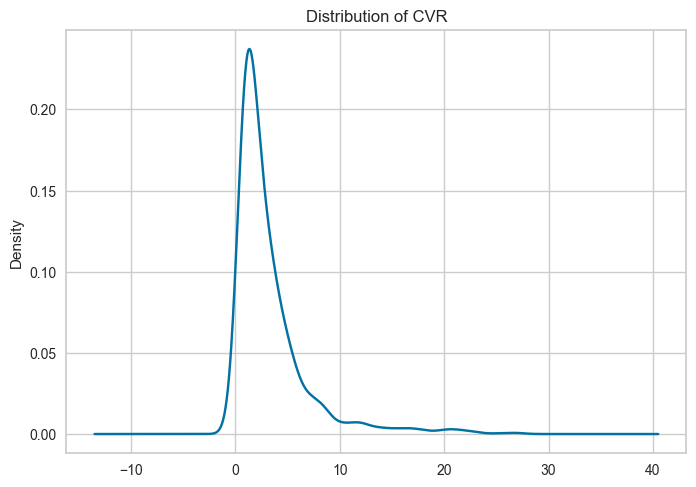

In [552]:
df_filtered_outliers['CVR'].plot(kind='kde', grid=True, title='Distribution of CVR')

# **Exploratory Data Analysis (EDA)**

In [553]:
df_filtered_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1861 entries, 1 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1861 non-null   int64         
 1   Year_Birth           1861 non-null   int64         
 2   Education            1861 non-null   object        
 3   Marital_Status       1861 non-null   object        
 4   Income               1861 non-null   float64       
 5   Kidhome              1861 non-null   int64         
 6   Teenhome             1861 non-null   int64         
 7   Dt_Customer          1861 non-null   datetime64[ns]
 8   Recency              1861 non-null   int64         
 9   MntCoke              1861 non-null   int64         
 10  MntFruits            1861 non-null   int64         
 11  MntMeatProducts      1861 non-null   int64         
 12  MntFishProducts      1861 non-null   int64         
 13  MntSweetProducts     1861 non-null   i

## Statistical Summary

In [554]:
df_filtered_outliers.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Group', 'Num_Child', 'Membership_Duration',
       'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR'],
      dtype='object')

In [555]:
new_nums_cols = ['Age', 'Num_Child', 'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR']
new_cats_cols = ['Age_Group']

desc_cols = ['Income', 'Recency', 'Membership_Duration', 'Age', 'Num_Child', 'Total_Acc_Camp', 'Total_Spending', 'Total_Purchases', 'CVR']

# Additional column grouping only for easily visible comparison
product_spending_cols = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase_type_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

In [556]:
# Product spending desc
df_filtered_outliers[product_spending_cols + ['Total_Spending']].describe().transpose()

count           mean            std     min      25%  \
MntCoke           1861.0  250929.607738  315826.131031     0.0  18000.0   
MntFruits         1861.0   17241.805481   29502.972217     0.0   1000.0   
MntMeatProducts   1861.0   97452.982268  124804.873802     0.0  13000.0   
MntFishProducts   1861.0   25399.247716   42295.989533     0.0   2000.0   
MntSweetProducts  1861.0   13378.291241   18221.128038     0.0   1000.0   
MntGoldProds      1861.0   36454.594304   45760.957987     0.0   7000.0   
Total_Spending    1861.0  440856.528748  477667.786596  5000.0  57000.0   

                       50%       75%        max  
MntCoke           100000.0  390000.0  1493000.0  
MntFruits           5000.0   19000.0   199000.0  
MntMeatProducts    42000.0  132000.0   553000.0  
MntFishProducts     8000.0   28000.0   258000.0  
MntSweetProducts    6000.0   18000.0    81000.0  
MntGoldProds       19000.0   43000.0   262000.0  
Total_Spending    231000.0  734000.0  2231000.0

In [557]:
# Product spending desc (sum)
pd.DataFrame(df_filtered_outliers[product_spending_cols + ['Total_Spending']].sum().rename('Sum'))

Sum
MntCoke           466980000
MntFruits          32087000
MntMeatProducts   181360000
MntFishProducts    47268000
MntSweetProducts   24897000
MntGoldProds       67842000
Total_Spending    820434000

In [558]:
# Purchase type desc
df_filtered_outliers[purchase_type_cols + ['Total_Purchases']].describe().transpose()

count       mean       std  min  25%   50%   75%   max
NumDealsPurchases    1861.0   2.465879  1.865228  0.0  1.0   2.0   3.0  15.0
NumWebPurchases      1861.0   3.787211  2.619379  0.0  2.0   3.0   6.0  11.0
NumCatalogPurchases  1861.0   2.002687  2.328527  0.0  0.0   1.0   3.0  10.0
NumStorePurchases    1861.0   5.309511  3.066794  0.0  3.0   4.0   7.0  13.0
Total_Purchases      1861.0  13.565287  7.418566  0.0  7.0  12.0  20.0  35.0

In [559]:
# Purchase type desc (sum)
pd.DataFrame(df_filtered_outliers[purchase_type_cols + ['Total_Purchases']].sum().rename('Sum'))

Sum
NumDealsPurchases     4589
NumWebPurchases       7048
NumCatalogPurchases   3727
NumStorePurchases     9881
Total_Purchases      25245

In [560]:
df_filtered_outliers[desc_cols].describe().transpose()

count          mean           std        min  \
Income               1861.0  4.699597e+07  1.856569e+07  1730000.0   
Recency              1861.0  4.867544e+01  2.893846e+01        0.0   
Membership_Duration  1861.0  1.095809e+01  6.834176e-01       10.0   
Age                  1861.0  5.500430e+01  1.146692e+01       28.0   
Num_Child            1861.0  1.081677e+00  7.212538e-01        0.0   
Total_Acc_Camp       1861.0  2.299839e-01  5.743472e-01        0.0   
Total_Spending       1861.0  4.408565e+05  4.776678e+05     5000.0   
Total_Purchases      1861.0  1.356529e+01  7.418566e+00        0.0   
CVR                  1861.0  3.285562e+00  3.657562e+00        0.0   

                             25%         50%         75%          max  
Income               33178000.00  46102000.0  61209000.0  105471000.0  
Recency                    24.00        49.0        74.0         99.0  
Membership_Duration        10.00        11.0        11.0         12.0  
Age                        47.00        54.0        64.0         84.0  
Num_Child                   1.00         1.0         1.0          3.0  
Total_Acc_Camp              0.00         0.0         0.0          4.0  
Total_Spending          57000.00    231000.0    734000.0    2231000.0  
Total_Purchases             7.00        12.0        20.0         35.0  
CVR                         1.12         2.0         4.0         27.0

**Major Findings:**

- The majority of customers have an income of Rp46,999,597 per year.
- Most customers will shop again approximately 1.5 months after their last purchase.
- The majority of customers have been members for 11 years.
- Most customers have only one child.
- The majority of customers make 12 purchase transactions, with the highest number through Store Purchase.
- Most customers spend Rp.231,000, with the highest spending on Coke.
- The majority of customers did not receive the campaign.
- The conversion rate from web visits to purchases for the majority of customers is only 2.0%.

In [561]:
df_filtered_outliers[cats_cols + new_cats_cols].describe(exclude='int64').transpose()

count unique           top  freq
Education       1861      5            S1   914
Marital_Status  1861      6       Menikah   725
Age_Group       1861      3  Middle Adult  1045

In [562]:
df_filtered_outliers[date_cols].describe().transpose()

count                           mean                  min  \
Dt_Customer  1861  2013-07-15 00:58:48.425577728  2012-07-30 00:00:00   

                             25%                  50%                  75%  \
Dt_Customer  2013-01-22 00:00:00  2013-07-17 00:00:00  2014-01-05 00:00:00   

                             max  
Dt_Customer  2014-06-29 00:00:00

## Univariate Analysis

In [563]:
len(desc_cols)

9

In [564]:
df_filtered_outliers.sample(10)

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
948   6515        1977        S1    Bertunangan  39771000.0        1   
134   5290        1964        S3        Menikah  41551000.0        1   
1917  4385        1981        S3         Lajang  36038000.0        1   
746   7235        1975        D3        Menikah  17003000.0        1   
1829  1087        1975        S2    Bertunangan  22669000.0        1   
1657  2295        1954        S3        Menikah  62670000.0        0   
2020  9829        1978        S1    Bertunangan  28587000.0        1   
725   7212        1966        S1        Menikah  44794000.0        0   
1404  6613        1970        S2        Menikah  44511000.0        1   
1646  5177        1974        S2        Menikah  58494000.0        0   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
948          0  2013-12-06       92     6000       2000            18000   
134          1  2013-08-14       51   220000          0            33000   
1917         0  2013-05-31       82    23000          0            15000   
746          0  2013-12-09       37     2000       5000            12000   
1829         0  2013-05-22       30    16000      14000            36000   
1657         1  2014-02-02       57   539000      30000            92000   
2020         0  2014-02-12       42    22000       4000            17000   
725          1  2014-06-08       99    54000          0             7000   
1404         0  2012-10-12       39   513000       7000           133000   
1646         1  2013-12-12       56   298000       7000            68000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
948              2000              8000         14000                  1   
134              3000                 0         23000                  5   
1917                0              2000          7000                  2   
746              4000              8000          7000                  3   
1829            37000             22000         48000                  3   
1657            80000             46000         38000                  1   
2020            12000             10000         13000                  3   
725                 0                 0          4000                  1   
1404            46000             14000         14000                  6   
1646             4000                 0         19000                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
948                 2                    0                  3   
134                 5                    1                  5   
1917                3                    0                  3   
746                 2                    0                  4   
1829                4                    1                  2   
1657                5                    3                 13   
2020                2                    0                  4   
725                 2                    0                  3   
1404                8                    4                  8   
1646                6                    2                  6   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
948                   4             0             0             0   
134                   8             0             0             0   
1917                  6             0             0             0   
746                   5             0             0             0   
1829                  9             0             0             0   
1657                  3             0             0             0   
2020                  6             0             0             0   
725                   6             0             0             0   
1404                  8             0             0             0   
1646                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Reve

### Numerical Columns

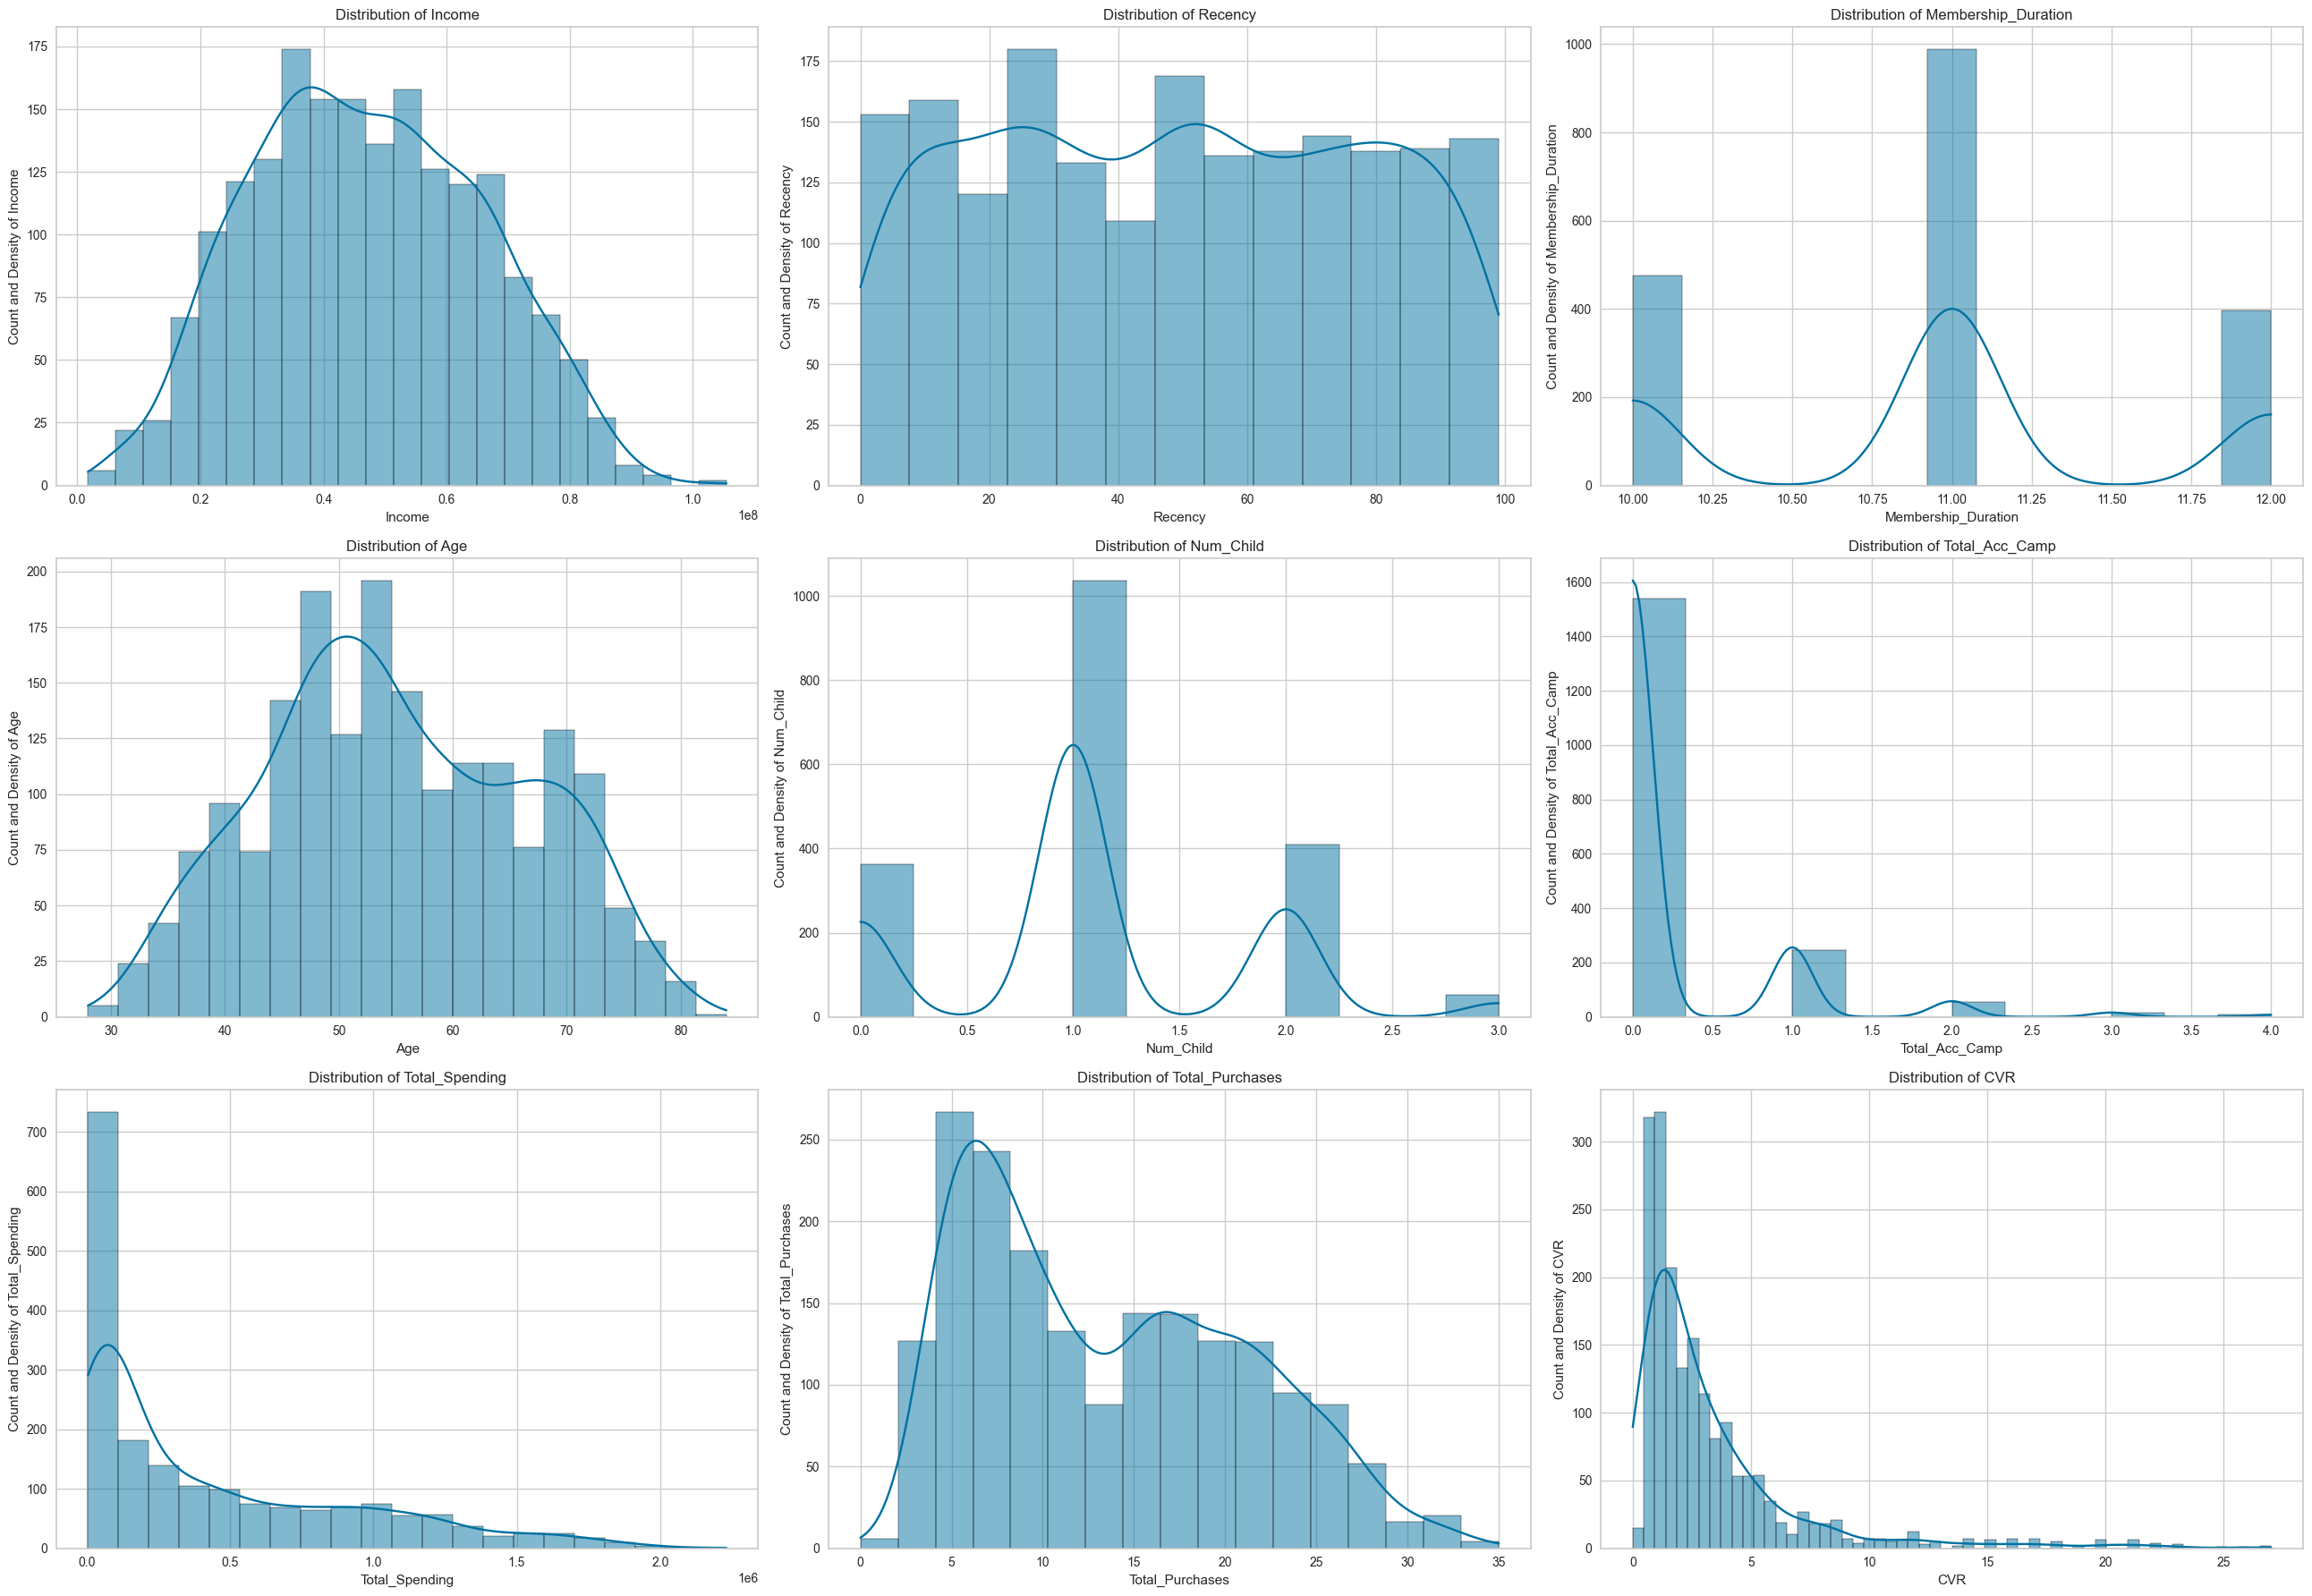

In [565]:
# Hisplot with kde
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(26, 18))
ax = ax.flatten()

for i in range(len(desc_cols)) :
  sns.histplot(data = df_filtered_outliers, ax=ax[i], x=desc_cols[i], kde=True)
  ax[i].set_title(f'Distribution of {desc_cols[i]}')
  ax[i].set_ylabel(f'Count and Density of {desc_cols[i]}')
  ax[i].set_xlabel(f'{desc_cols[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_filtered_outliers.columns) < len(ax) :
    ax[len(df_filtered_outliers.columns)].remove()

plt.tight_layout()
plt.show()

In [566]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols + new_nums_cols:
    data = df_filtered_outliers[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols + new_nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Z_CostContact', 'Z_Revenue']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Kidhome', 'Teenhome']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

Column Name  Skewness  Kurtosis  \
0            Year_Birth    -0.110    -0.793   
1                Income     0.127    -0.648   
2               Kidhome     0.380    -0.960   
3              Teenhome     0.239    -1.020   
4               Recency     0.018    -1.203   
5               MntCoke     1.531     1.771   
6             MntFruits     2.979    10.288   
7       MntMeatProducts     1.756     2.372   
8       MntFishProducts     2.675     7.653   
9      MntSweetProducts     1.789     2.571   
10         MntGoldProds     2.130     4.517   
11    NumDealsPurchases     2.083     6.623   
12      NumWebPurchases     0.841    -0.076   
13  NumCatalogPurchases     1.504     1.853   
14    NumStorePurchases     0.977    -0.081   
15    NumWebVisitsMonth     0.246     3.494   
16        Z_CostContact       NaN       NaN   
17            Z_Revenue       NaN       NaN   
18                  Age     0.110    -0.793   
19            Num_Child     0.324    -0.035   
20       Total_Acc_Camp     3.100    11.472   
21       Total_Spending     1.150     0.353   
22      Total_Purchases     0.468    -0.868   
23                  CVR     2.892    10.327   

                          Type of Distribution  
0              Normal Distribution (Symmetric)  
1              Normal Distribution (Symmetric)  
2                         Bimodal Distribution  
3                         Bimodal Distribution  
4              Normal Distribution (Symmetric)  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8                     Highly Positively Skewed  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11                    Highly Positively Skewed  
12                Moderately Positively Skewed  
13                    Highly Positively Skewed  
14                Moderately Positively Skewed  
15  Moderately Normal Distribution (Symmetric)  
16                        Uniform Distribution  
17                        Uniform Distribution  
18             Normal Distribution (Symmetric)  
19  Moderately Normal Distribution (Symmetric)  
20                    Highly Positively Skewed  
21                    Highly Positively Skewed  
22  Moderately Normal Distribution (Symmetric)  
23                    Highly Positively Skewed

Distribution types of each column can be seen in above dataframe.

### Categorical Columns

In [567]:
len(df_filtered_outliers[cats_cols].columns)

10

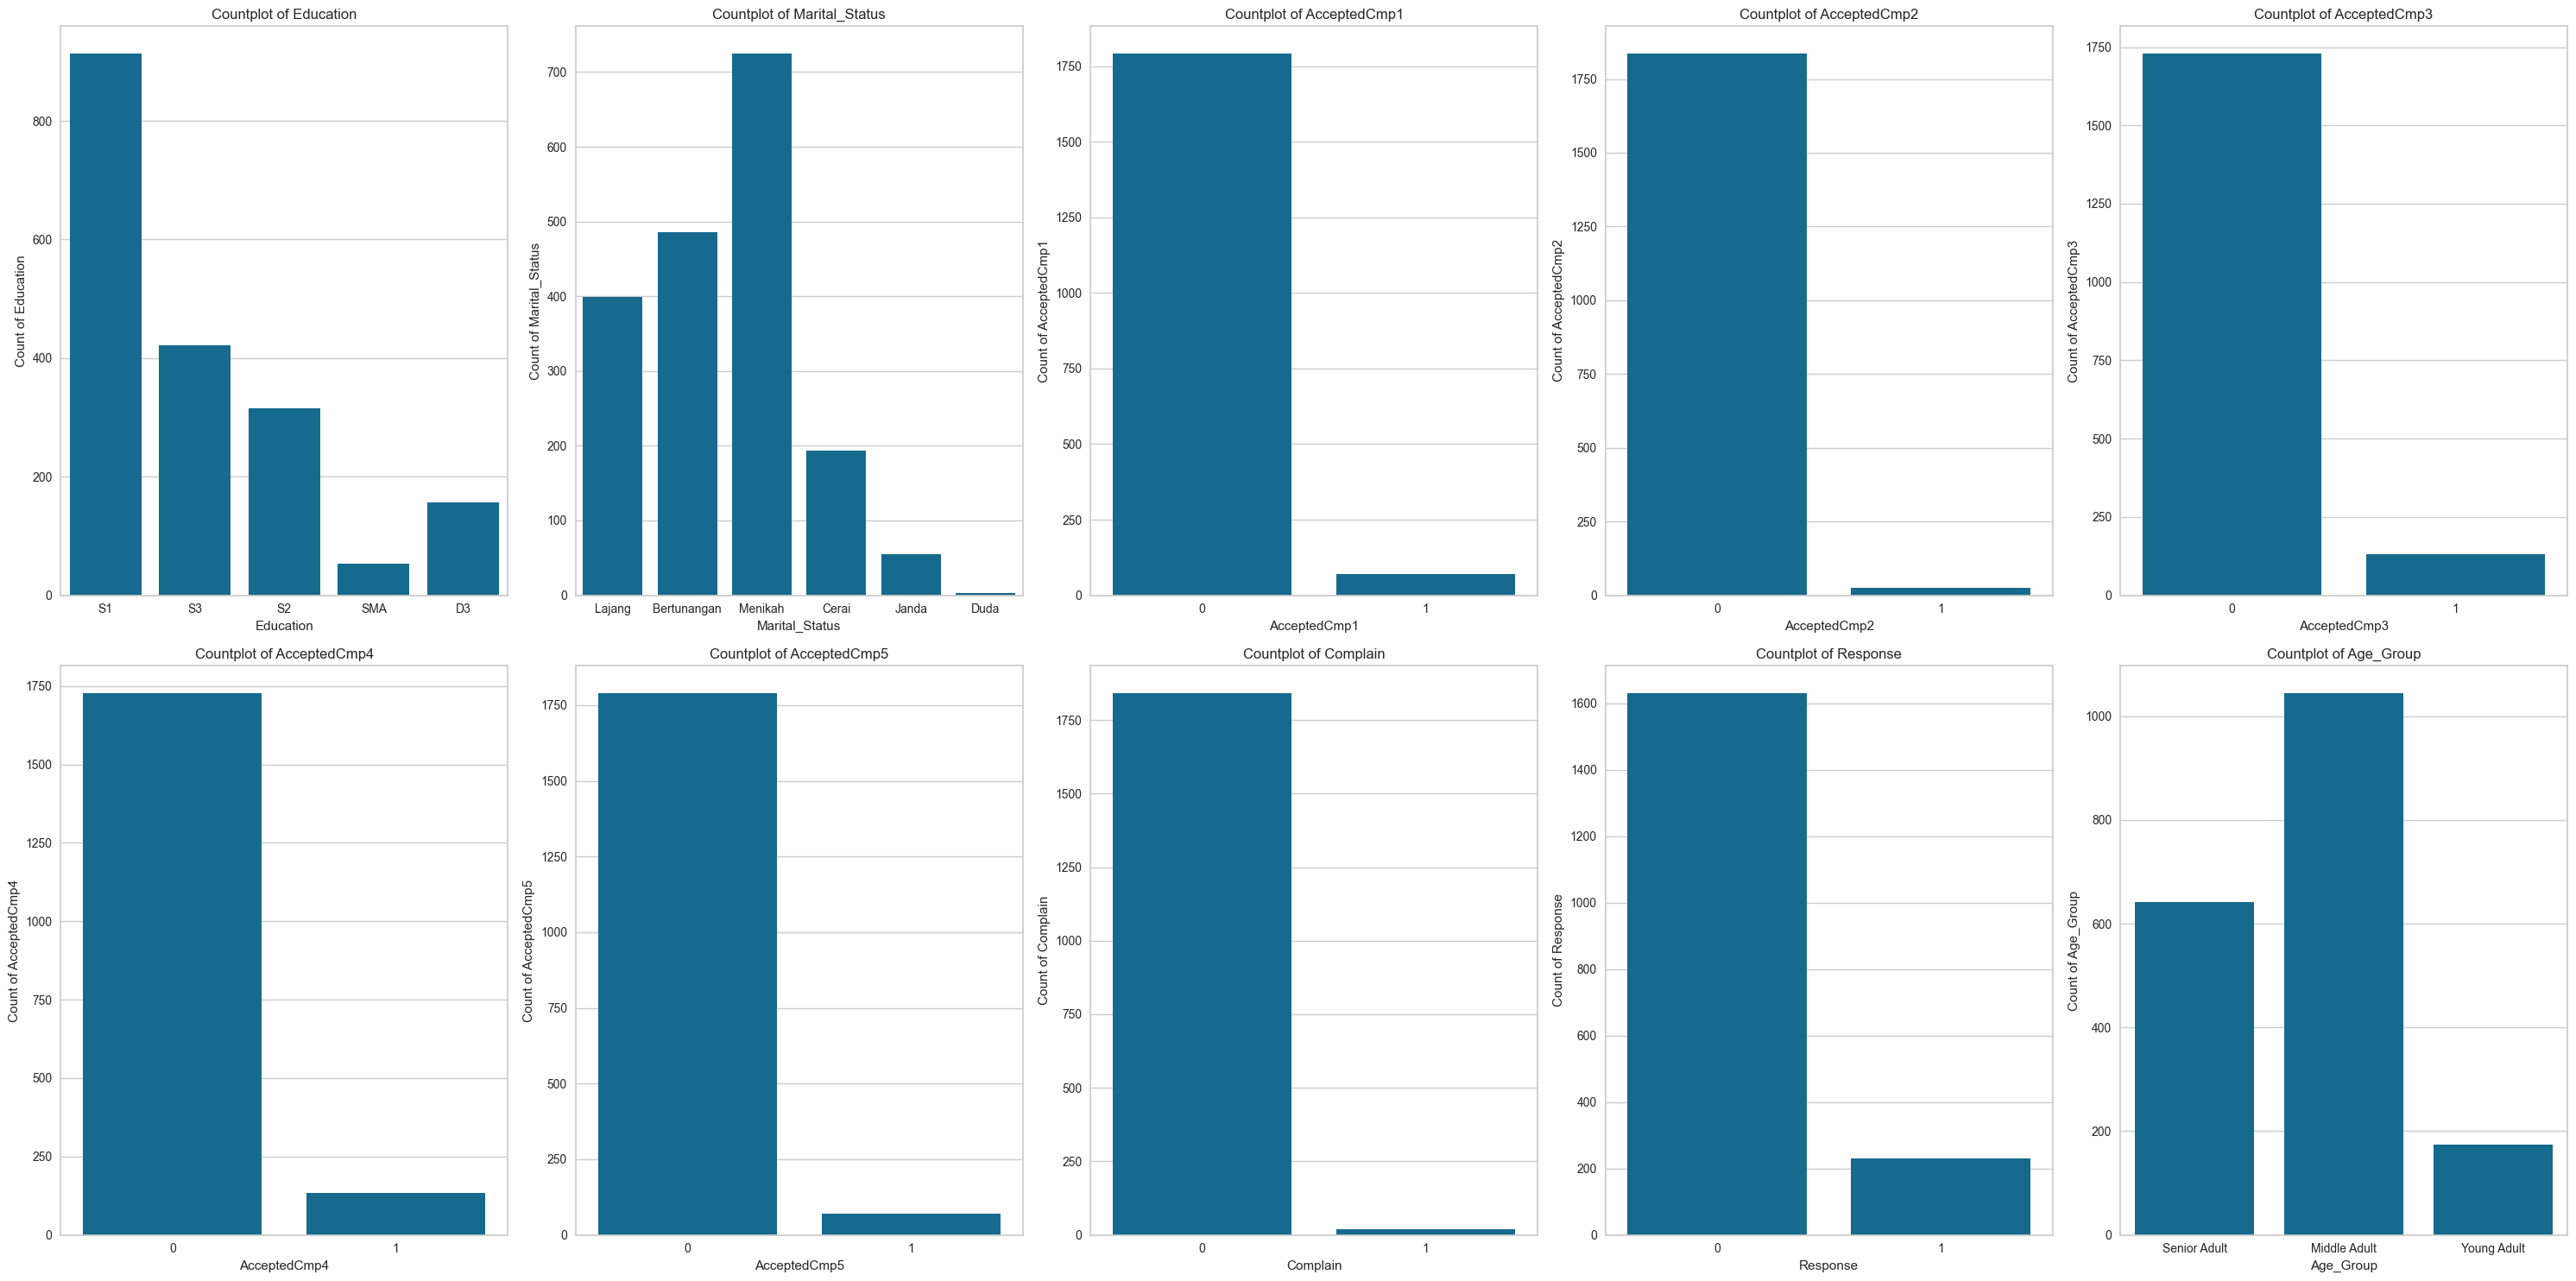

In [568]:
# Coutplot
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,15))
ax = ax.flatten()

cats_cols_excluding_id = [col for col in cats_cols if col != 'ID']
cats_cols_excluding_id.extend(new_cats_cols)

for i in range(len(cats_cols_excluding_id)) :
    sns.countplot(data=df_filtered_outliers, ax=ax[i], x=cats_cols_excluding_id[i])
    ax[i].set_title(f'Countplot of {cats_cols_excluding_id[i]}')
    ax[i].set_ylabel(f'Count of {cats_cols_excluding_id[i]}')
    ax[i].set_xlabel(f'{cats_cols_excluding_id[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_filtered_outliers.columns) < len(ax) :
    ax[len(df_filtered_outliers.columns)].remove()

plt.tight_layout()
plt.show()

**Major Findings :**

- The majority of customers have at least a Bachelor's degree.
- The majority of customers are married.
- The majority of customers do not file complaints.
- The majority of customers do not respond to the campaign.
- The majority of customers are middle adults (age 40-60).

## Bivariate Analysis

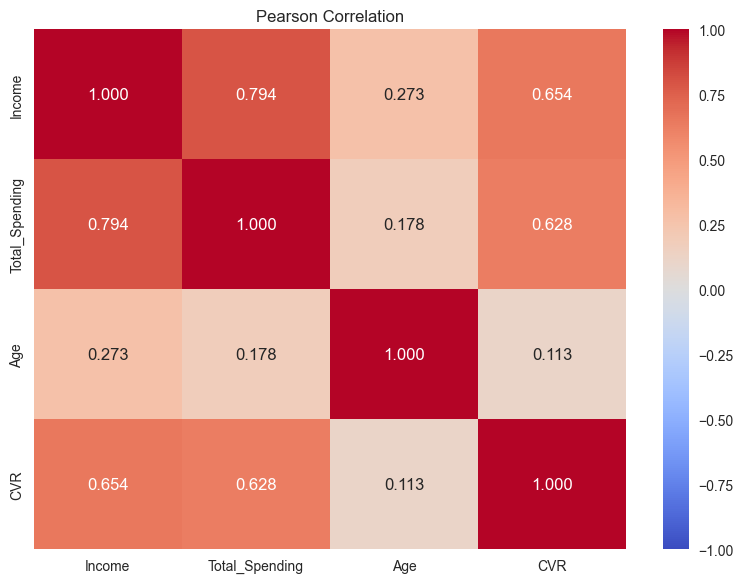

In [569]:
# Correlation heatmap of numerical features and target

included_col = ['Income', 'Total_Spending', 'Age', 'CVR']
# cmap_custom = sns.diverging_palette(240, 10, as_cmap=True)

# Plot correlation heatmap with Pearson method
plt.figure(figsize=(8,6))
sns.heatmap(data=df_filtered_outliers[included_col].corr(), cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.title('Pearson Correlation')

plt.tight_layout()
plt.show()

**Major Findings :**

- Most of the features have positive correlation to each other.
- `Income` and `Total_Spending` have high/strong positive correlation to `CVR` while `Age` have low/weak positive correlation to `CVR`.

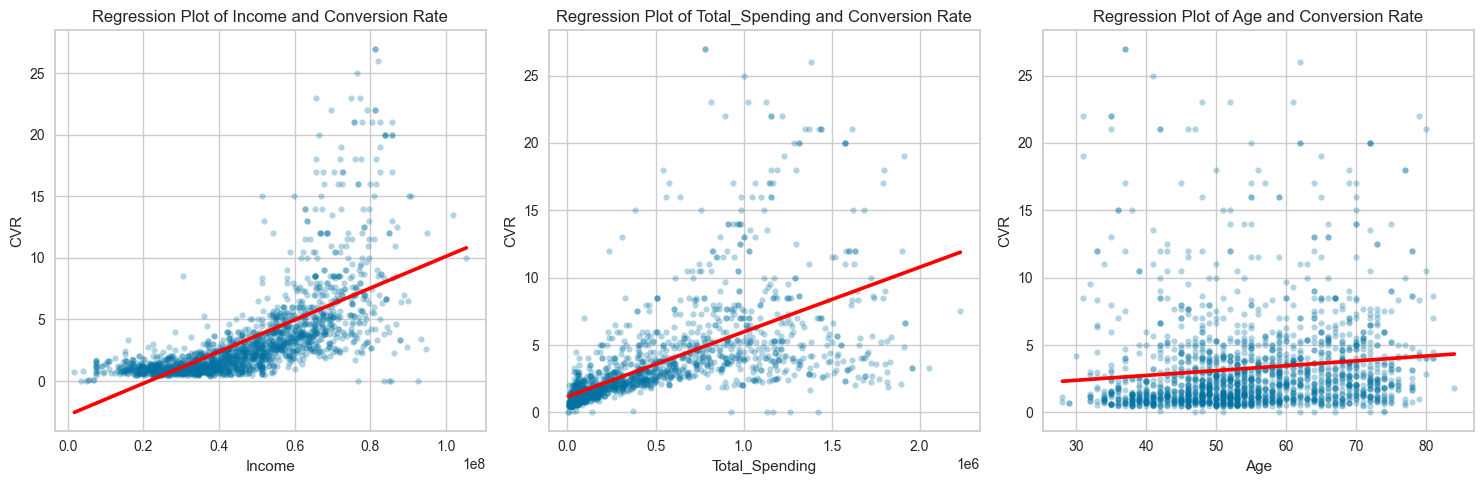

In [570]:
# Regplot of CVR vs Income, Total Spending, and Age

included_col = ['Income', 'Total_Spending', 'Age']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax = ax.flatten()

for i in range(len(included_col)):
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=included_col[i], y='CVR', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
    ax[i].set_title(f'Regression Plot of {included_col[i]} and Conversion Rate')
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Overall, income and total spending have a positive correlation with purchase conversion rate (CVR).
    - This means that the higher the income and total spending, the higher the likelihood of conversion or purchase from potential consumers.
    - This positive correlation may be caused by several factors, such as better financial ability to meet the needs or desires of customers, as well as a high perceived value of the products or services offered. Therefore, companies can pay attention to and optimize their marketing strategies by considering target audiences with higher incomes and total spending, thereby increasing conversion opportunities and the overall success of marketing campaigns.

- Meanwhile, age features tend to have a non-significant correlation with the conversion rate. This means that age is not a dominant factor influencing consumer decisions to convert or make purchases.

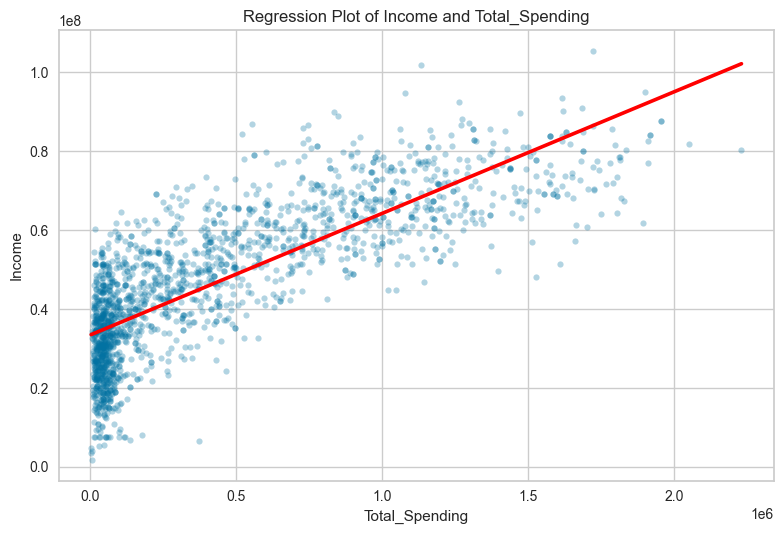

In [571]:
# Regplot of Income vs Total Spending

sns.regplot(data=df_filtered_outliers, x='Total_Spending', y='Income', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
plt.title(f'Regression Plot of Income and Total_Spending')
plt.grid(True)
    
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Income and total spending have a strong positive correlation.
- This indicates a significant relationship between an individual's income level and their spending patterns. The higher someone's income, the more likely they are to have higher spending.

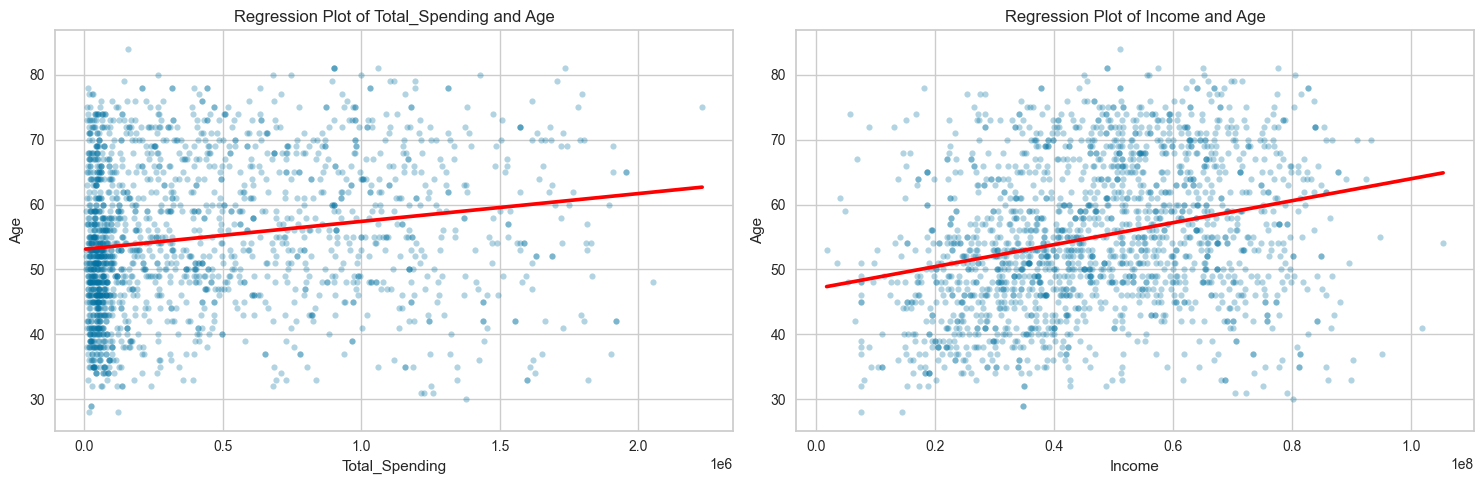

In [572]:
# Regplot of Age vs Total Spending and Income

included_col = ['Total_Spending', 'Income']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()

for i in range(len(included_col)):
    sns.regplot(data=df_filtered_outliers, ax=ax[i], x=included_col[i], y='Age', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
    ax[i].set_title(f'Regression Plot of {included_col[i]} and Age')
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

**Major Findings :**

> The findings are the further explanation from heatmap correlation before

- Age has a weak positive correlation and even lacks significant correlation with the income (Income) or total spending features.
- This means that age does not directly influence an individual's income level or spending patterns. However, companies still need to consider age as part of their marketing strategy. Although the weak correlation suggests that age may not be a primary determinant factor in consumer decisions.

## Multivariate Analysis

<Figure size 1500x1500 with 0 Axes>

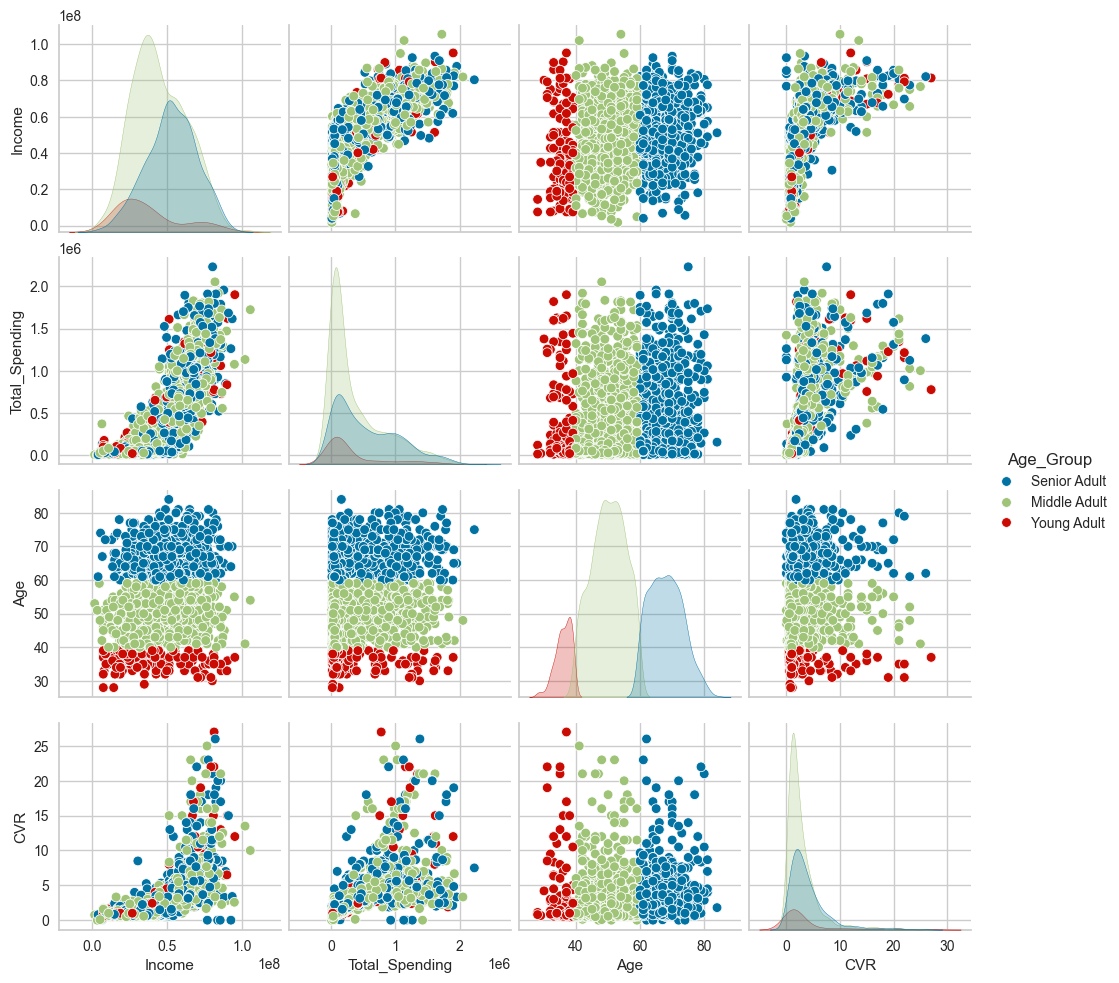

In [573]:
# Pairplot with hue Age Group
plt.figure(figsize=(15,15))

included_col = ['Income', 'Total_Spending', 'Age', 'CVR']

sns.pairplot(data=df_filtered_outliers[included_col +['Age_Group']], hue='Age_Group', diag_kind='kde')
plt.show()

There aren't any interesting insights or significant patterns from the separation of Age Group between Income, Total Spending, and CVR. This further indicates that age may not be the dominant factor influencing the relationship between Income, Total Spending, and the conversion rate (CVR).

# **Task 2 : Data Pre-Processing**

In [574]:
df_preprocessed = df_filtered_outliers.copy()
df_preprocessed

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
1     2174        1954        S1         Lajang  46344000.0        1   
2     4141        1965        S1    Bertunangan  71613000.0        0   
3     6182        1984        S1    Bertunangan  26646000.0        1   
4     5324        1981        S3        Menikah  58293000.0        1   
5     7446        1967        S2    Bertunangan  62513000.0        0   
...    ...         ...       ...            ...         ...      ...   
2234  8372        1974        S1        Menikah  34421000.0        1   
2236  4001        1946        S3    Bertunangan  64014000.0        2   
2237  7270        1981        S1          Cerai  56981000.0        0   
2238  8235        1956        S2    Bertunangan  69245000.0        0   
2239  9405        1954        S3        Menikah  52869000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
1            1  2014-03-08       38    11000       1000             6000   
2            0  2013-08-21       26   426000      49000           127000   
3            0  2014-02-10       26    11000       4000            20000   
4            0  2014-01-19       94   173000      43000           118000   
5            1  2013-09-09       16   520000      42000            98000   
...        ...         ...      ...      ...        ...              ...   
2234         0  2013-07-01       81     3000       3000             7000   
2236         1  2014-06-10       56   406000          0            30000   
2237         0  2014-01-25       91   908000      48000           217000   
2238         1  2014-01-24        8   428000      30000           214000   
2239         1  2012-10-15       40    84000       3000            61000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                2000              1000          6000                  2   
2              111000             21000         42000                  1   
3               10000              3000          5000                  2   
4               46000             27000         15000                  5   
5                   0             42000         14000                  2   
...               ...               ...           ...                ...   
2234             6000              2000          9000                  1   
2236                0                 0          8000                  7   
2237            32000             12000         24000                  1   
2238            80000             30000         61000                  2   
2239             2000              1000         21000                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
5                   6                    4                 10   
...               ...                  ...                ...   
2234                1                    0                  2   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
5                     6             0             0             0   
...                 ...           ...           ...           ...   
2234                  7             0             0  

## Feature Encoding

In [575]:
encoded_features = ['Education', 'Marital_Status', 'Age_Group']

for col in encoded_features :
    print(col)
    print(df_preprocessed[col].unique())
    print()

Education
['S1' 'S3' 'S2' 'SMA' 'D3']

Marital_Status
['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']

Age_Group
['Senior Adult' 'Middle Adult' 'Young Adult']



In [576]:
# Before encoding
df_preprocessed[['Education', 'Age_Group', 'Marital_Status']].head()

Education     Age_Group Marital_Status
1        S1  Senior Adult         Lajang
2        S1  Middle Adult    Bertunangan
3        S1  Middle Adult    Bertunangan
4        S3  Middle Adult        Menikah
5        S2  Middle Adult    Bertunangan

In [577]:
# Label encoding for Education and Age_Group
df_preprocessed['Education'] = df_preprocessed['Education'].replace({'SMA' : 0,
                                                                    'D3' : 1,
                                                                    'S1' : 2,
                                                                    'S2' : 3,
                                                                    'S3' : 4})


df_preprocessed['Age_Group'] = df_preprocessed['Age_Group'].replace({'Young Adult' : 0,
                                                                    'Middle Adult' : 1,
                                                                    'Senior Adult' : 2})

In [578]:
# One-hot encoding for Marital_Status
onehots = pd.get_dummies(df_preprocessed['Marital_Status'], prefix='Marital_Status')
onehots = onehots.astype(int)
df_preprocessed = pd.concat([df_preprocessed, onehots], axis=1)

In [579]:
# After encoding
df_preprocessed[['Education', 'Age_Group', 'Marital_Status_Bertunangan', 'Marital_Status_Cerai',
                'Marital_Status_Duda', 'Marital_Status_Janda', 'Marital_Status_Lajang', 'Marital_Status_Menikah']].head()

Education  Age_Group  Marital_Status_Bertunangan  Marital_Status_Cerai  \
1          2          2                           0                     0   
2          2          1                           1                     0   
3          2          1                           1                     0   
4          4          1                           0                     0   
5          3          1                           1                     0   

   Marital_Status_Duda  Marital_Status_Janda  Marital_Status_Lajang  \
1                    0                     0                      1   
2                    0                     0                      0   
3                    0                     0                      0   
4                    0                     0                      0   
5                    0                     0                      0   

   Marital_Status_Menikah  
1                       0  
2                       0  
3                       0  
4                       1  
5                       0

Now we would need to drop some unnecessary/unrelated columns before building our model, features that will be drop are :
> `ID`, `Year_Birth`, `Marital_Status`, `Dt_Customer`

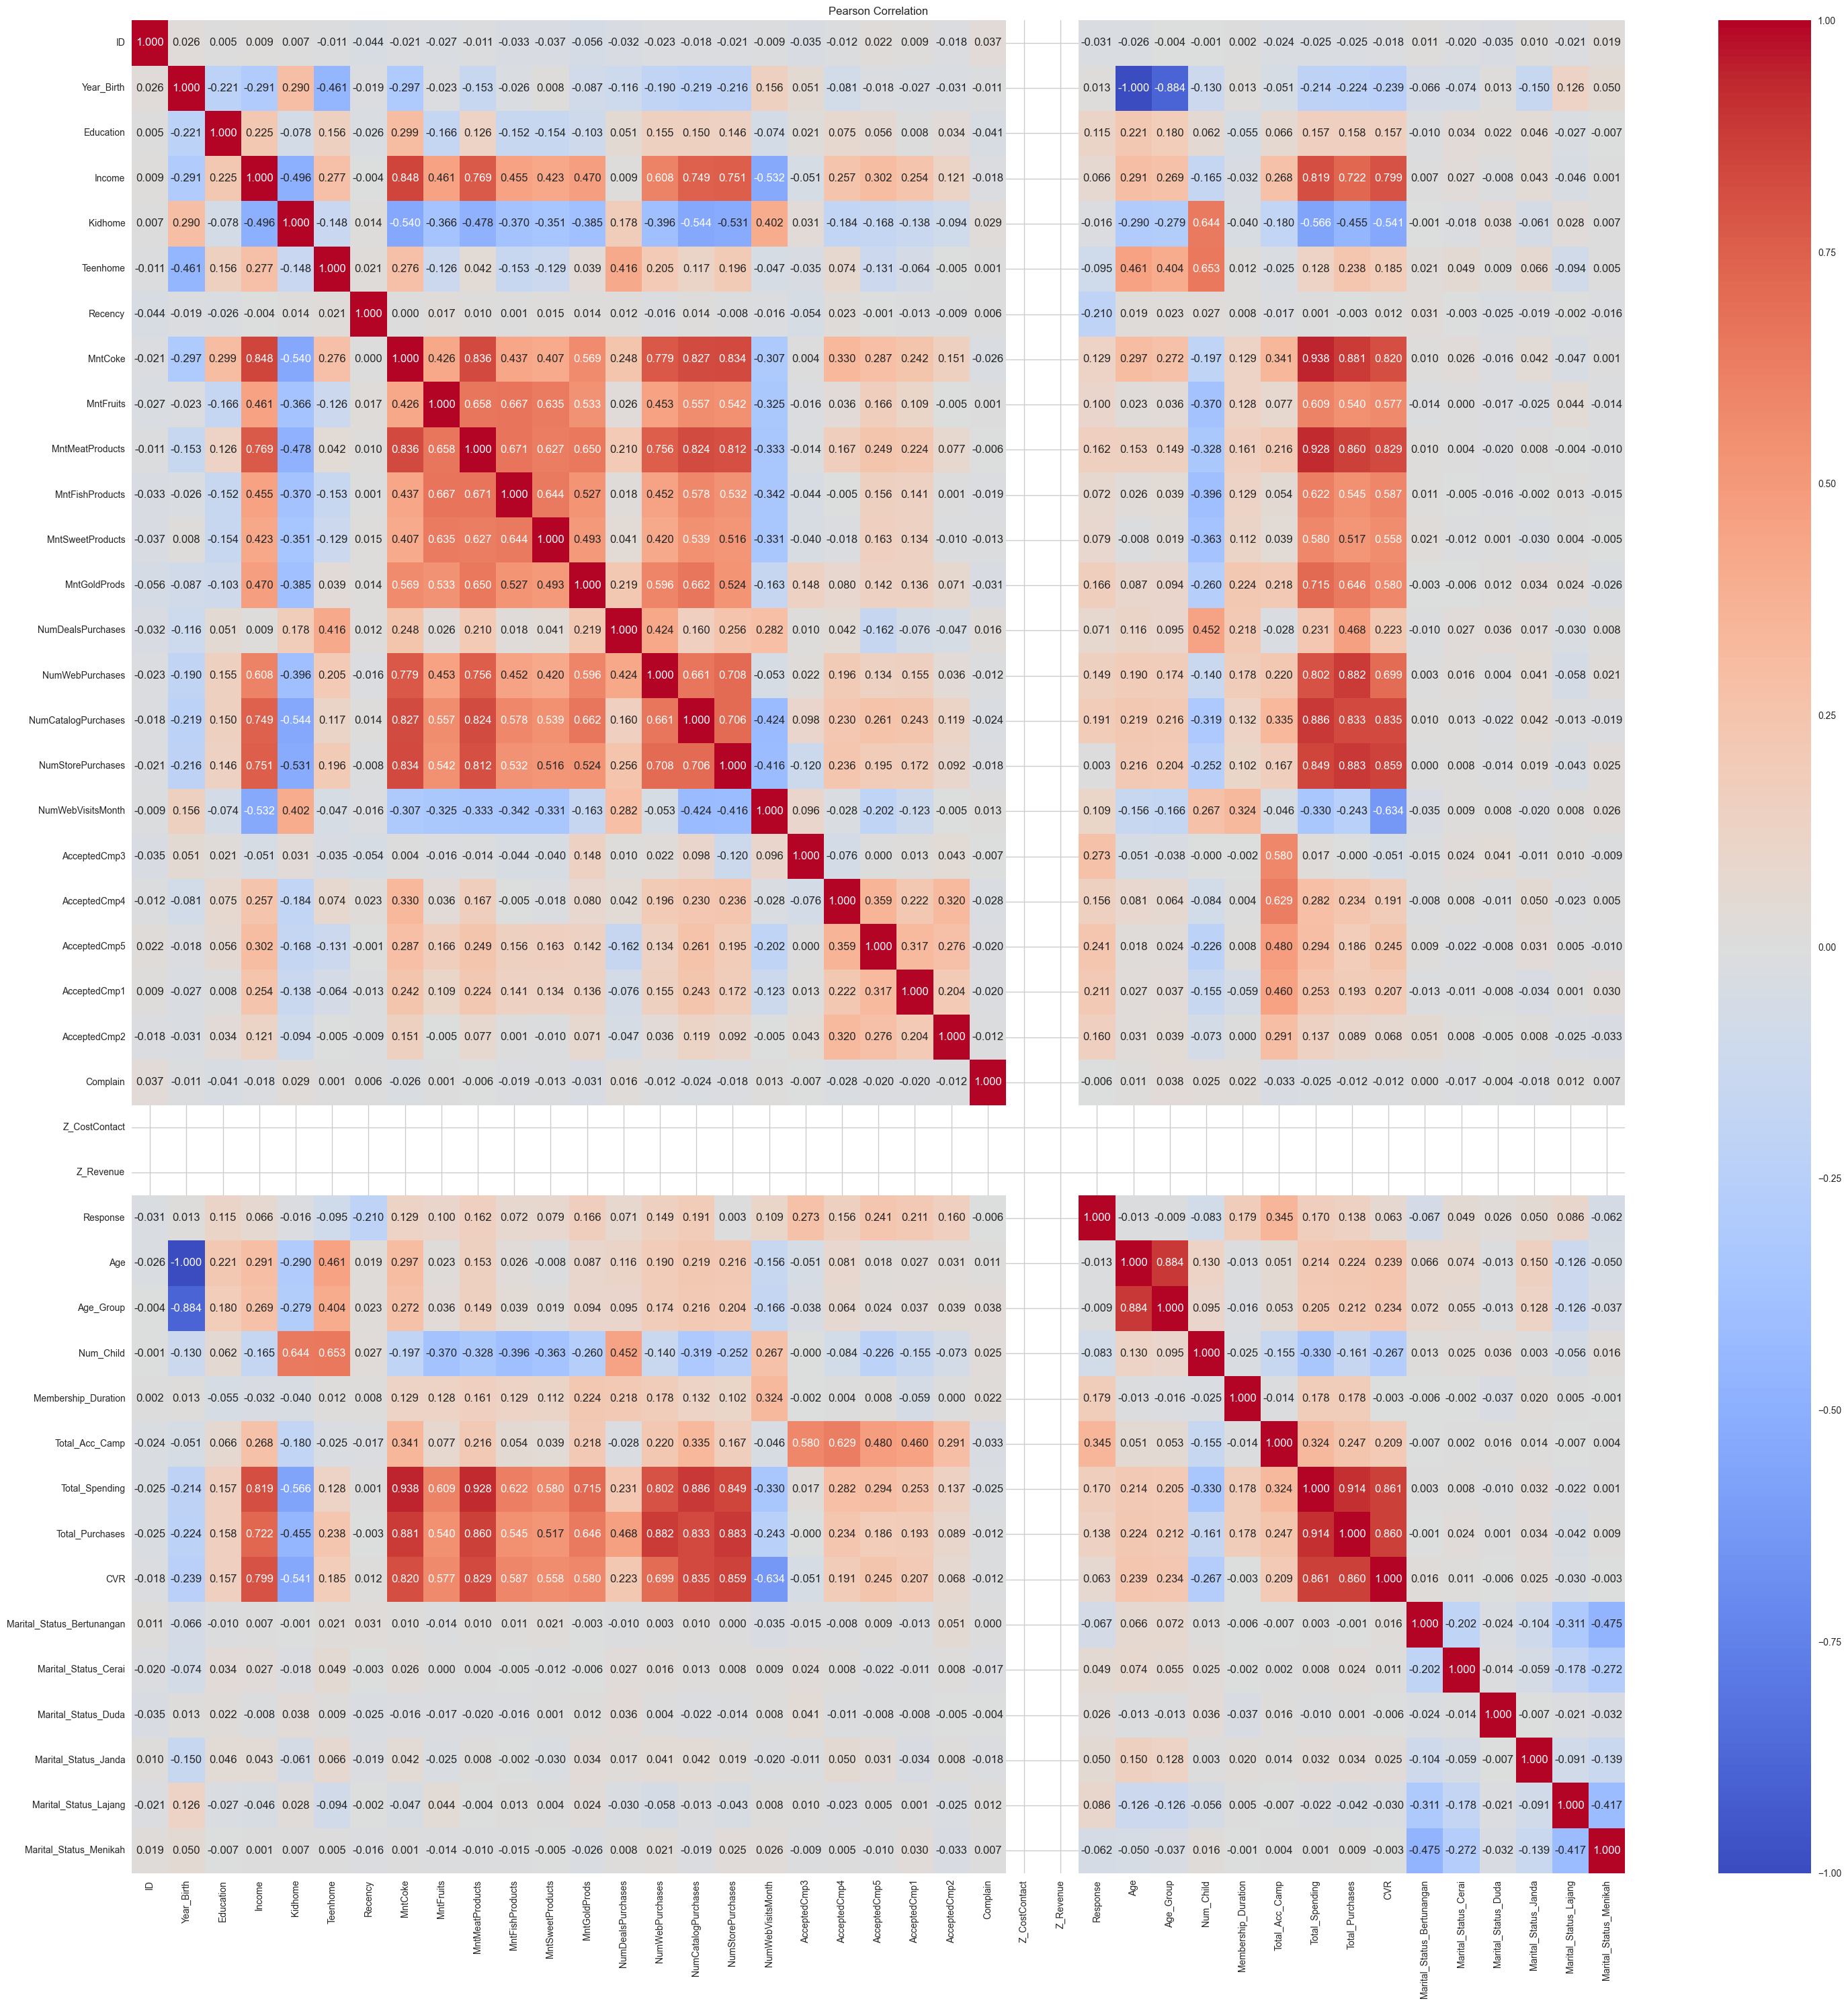

In [581]:
# Correlation heatmap of numerical features and target

# Plot correlation heatmap with Spearmann method
plt.figure(figsize=(30,30))
sns.heatmap(data=df_preprocessed.corr(method='spearman', numeric_only=True), cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.title('Pearson Correlation')

plt.tight_layout()
plt.show()

In [582]:
# Drop unnecessary columns
df_preprocessed.drop(columns=['ID', 'Year_Birth', 'Marital_Status', 'Dt_Customer'], inplace=True)

In [583]:
# Check if all features are all in numeric
pd.DataFrame(df_preprocessed.dtypes, columns=['Data Types'])

Data Types
Education                       int64
Income                        float64
Kidhome                         int64
Teenhome                        int64
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue                       int64
Response                        int64
Age                             int64
Age_Group                       int64
Num_Child                       int64
Membership_Duration             int32
Total_Acc_Camp                  int64
Total_Spending                  int64
Total_Purchases                 int64
CVR                           float64
Marital_Status_Bertunangan      int32
Marital_Status_Cerai            int32
Marital_Status_Duda             int32
Marital_Status_Janda            int32
Marital_Status_Lajang           int32
Marital_Status_Menikah          int32

Now that all features are in numeric form, we move to the scaling process.

## Feature Scaling

In [584]:
len(df_preprocessed.columns)

39

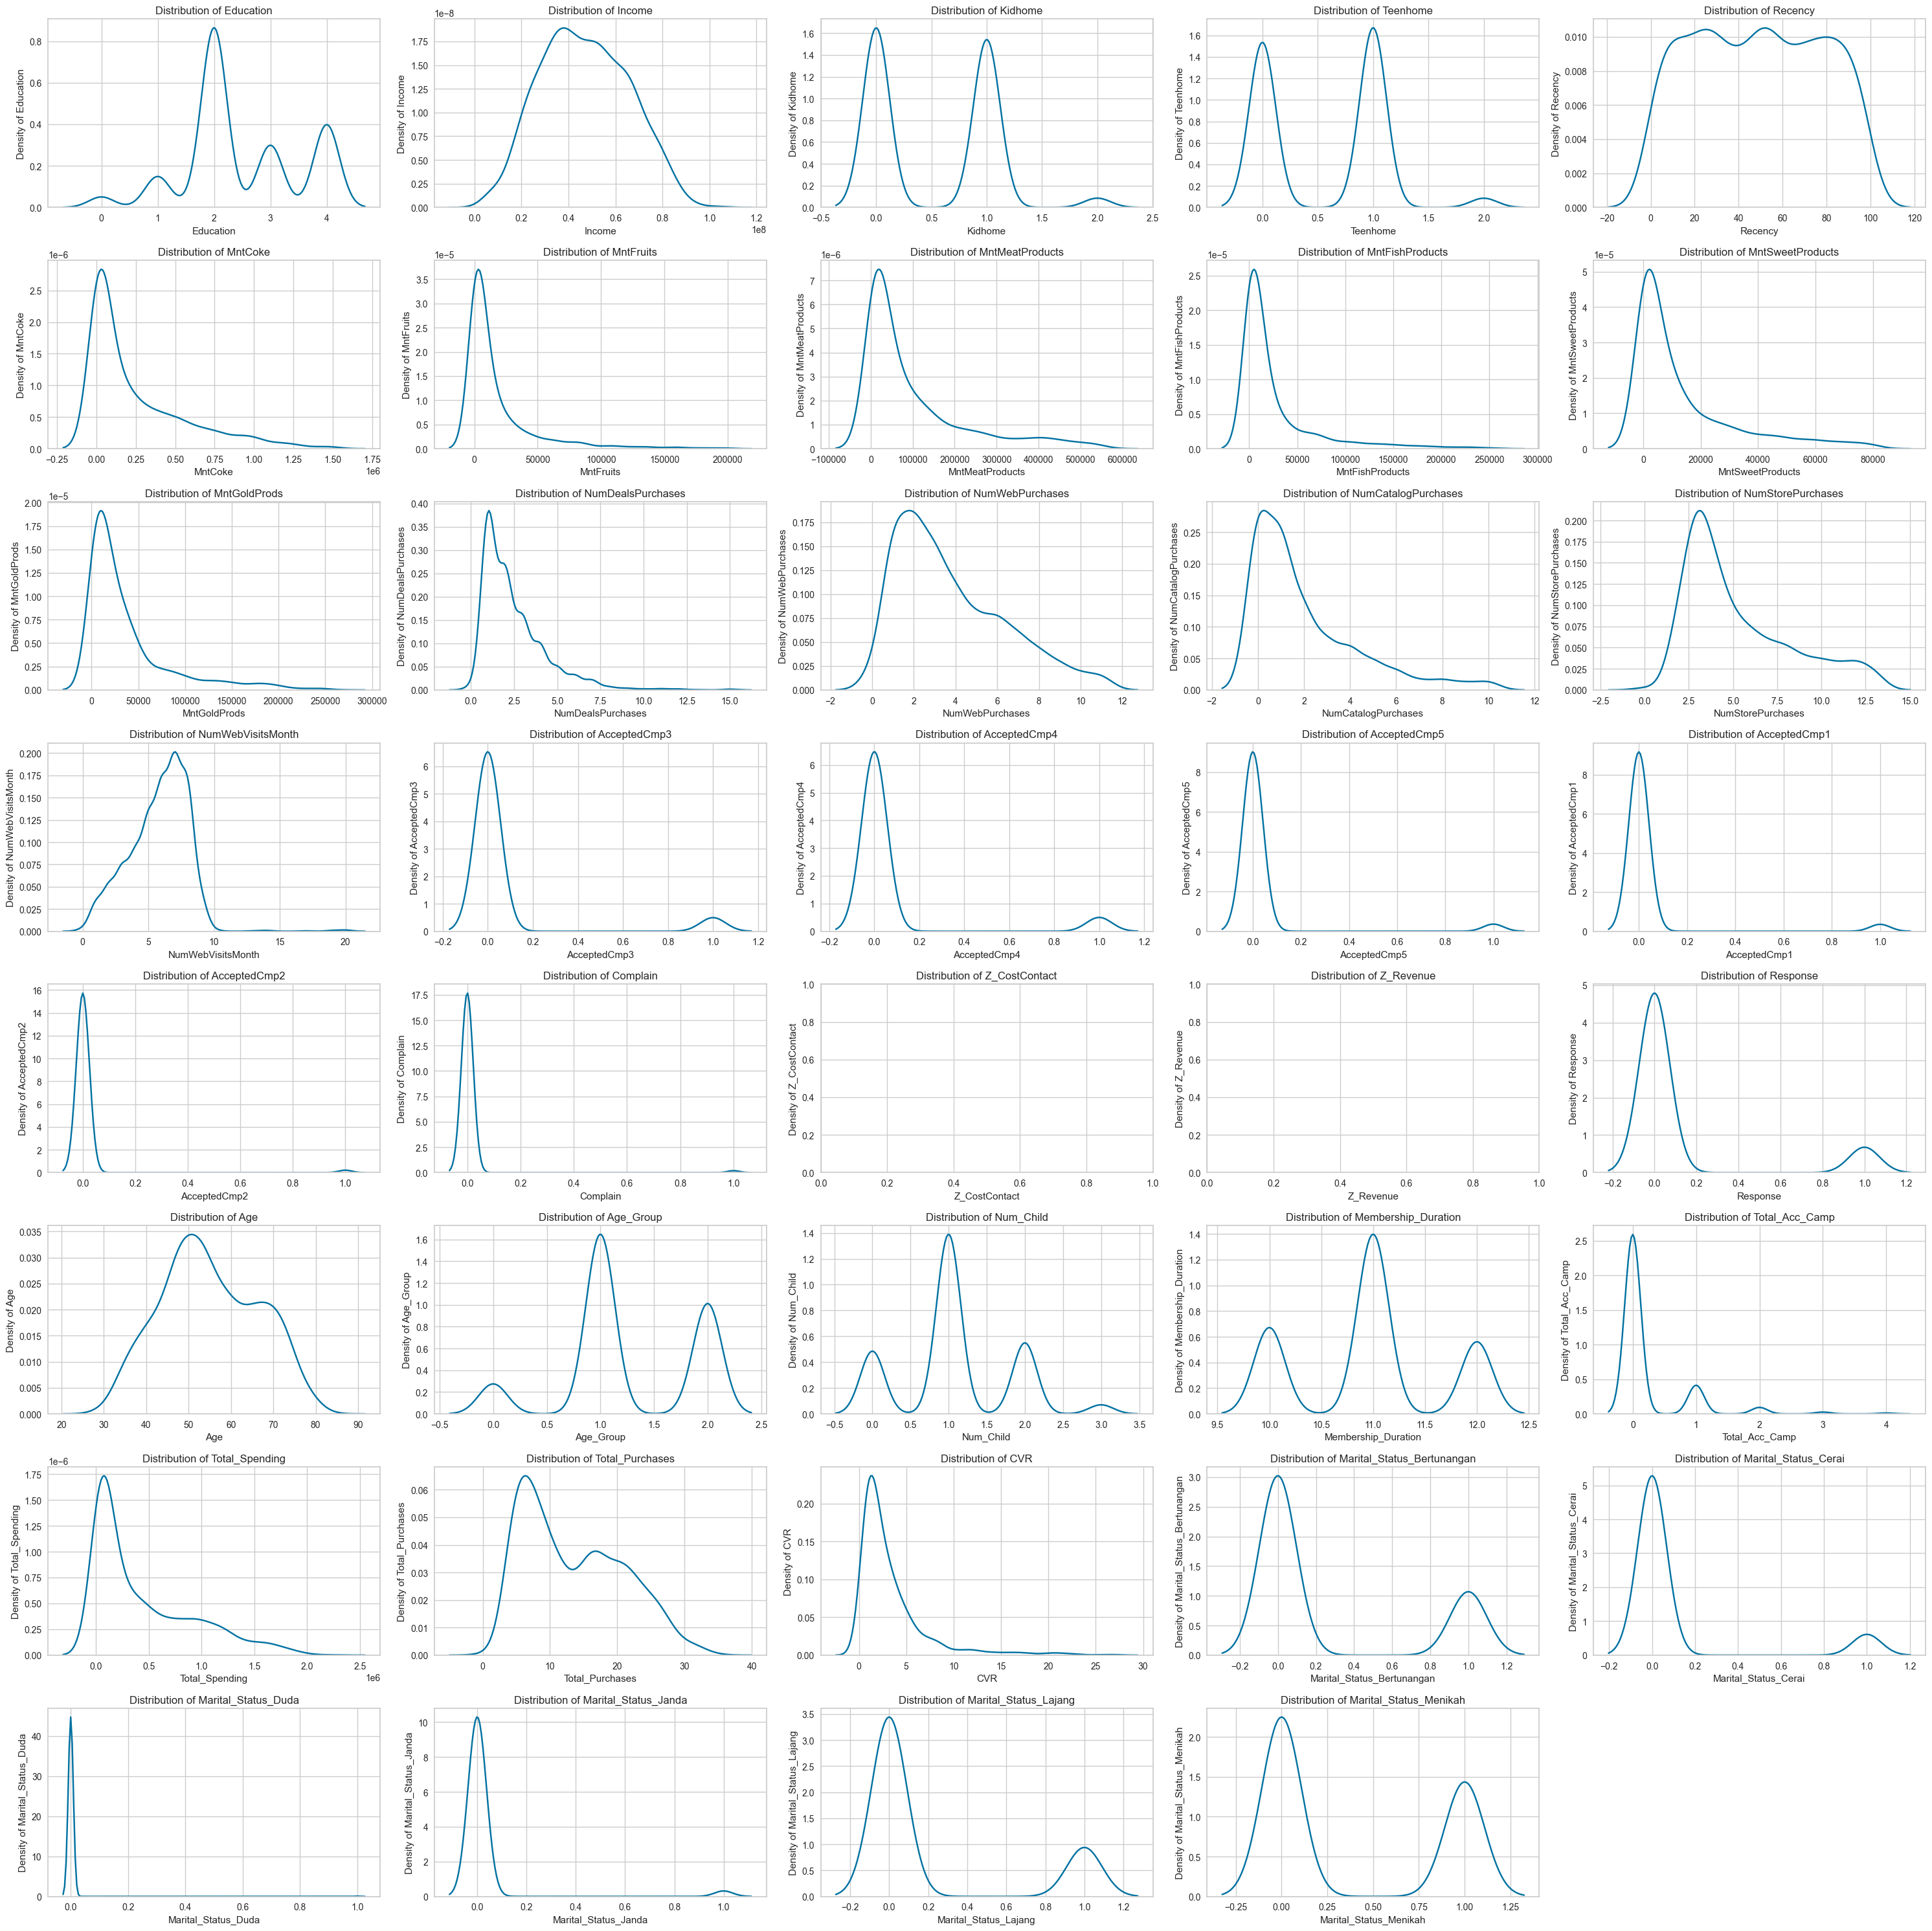

In [585]:
#Kdeplot before scaling
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(30,30))
axes = axes.flatten()

for i in range(len(df_preprocessed.columns)) :
    sns.kdeplot(data = df_preprocessed, ax=axes[i], x=df_preprocessed.columns[i])
    axes[i].set_title(f'Distribution of {df_preprocessed.columns[i]}')
    axes[i].set_ylabel(f'Density of {df_preprocessed.columns[i]}')
    axes[i].set_xlabel(f'{df_preprocessed.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_preprocessed.columns) < len(axes):
    axes[len(df_preprocessed.columns)].remove()

plt.tight_layout()
plt.show()

In [586]:
# Standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_std_values = ss.fit_transform(df_preprocessed[df_preprocessed.columns])

In [587]:
df_preprocessed = pd.DataFrame(df_std_values, columns=df_preprocessed.columns)
df_preprocessed

Education    Income   Kidhome  Teenhome   Recency   MntCoke  MntFruits  \
0     -0.471204 -0.035126  0.870580  0.807079 -0.369001 -0.759893  -0.550662   
1     -0.471204  1.326298 -0.951860 -1.024596 -0.783785  0.554474   1.076730   
2     -0.471204 -1.096400  0.870580 -1.024596 -0.783785 -0.759893  -0.448950   
3      1.488372  0.608653  0.870580 -1.024596  1.566660 -0.246815   0.873306   
4      0.508584  0.836015 -0.951860  0.807079 -1.129439  0.852186   0.839402   
...         ...       ...       ...       ...       ...       ...        ...   
1856  -0.471204 -0.677505  0.870580 -1.024596  1.117311 -0.785230  -0.482854   
1857   1.488372  0.916885  2.693021  0.807079  0.253176  0.491131  -0.584566   
1858  -0.471204  0.537966 -0.951860 -1.024596  1.462964  2.081041   1.042826   
1859   0.508584  1.198717 -0.951860  0.807079 -1.405962  0.560809   0.432554   
1860   1.488372  0.316423  0.870580  0.807079 -0.299870 -0.528691  -0.482854   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0           -0.732965        -0.553375         -0.679520     -0.665694   
1            0.236809         2.024394          0.418402      0.121215   
2           -0.620759        -0.364181         -0.569728     -0.687552   
3            0.164677         0.487193          0.747779     -0.468967   
4            0.004384        -0.600673          1.571220     -0.490825   
...               ...              ...               ...           ...   
1856        -0.724950        -0.458778         -0.624624     -0.600118   
1857        -0.540613        -0.600673         -0.734416     -0.621977   
1858         0.958129         0.156103         -0.075663     -0.272240   
1859         0.934085         1.291267          0.912467      0.536527   
1860        -0.292158        -0.553375         -0.679520     -0.337815   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0             -0.249837        -1.064359            -0.430726   
1             -0.786109         1.608748            -0.001154   
2             -0.249837        -0.682487            -0.860297   
3              1.358977         0.463131             0.428417   
4             -0.249837         0.845003             0.857989   
...                 ...              ...                  ...   
1856          -0.786109        -1.064359            -0.860297   
1857           2.431520         1.608748            -0.001154   
1858          -0.786109        -0.682487             0.428417   
1859          -0.249837         0.845003             1.287561   
1860           0.286434        -0.300614            -0.430726   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0             -1.079434          -0.355322     -0.275177     -0.277430   
1              1.529855          -0.803022     -0.275177     -0.277430   
2             -0.427111           0.092379     -0.275177     -0.277430   
3              0.225211          -0.355322     -0.275177     -0.277430   
4              1.529855           0.092379     -0.275177     -0.277430   
...                 ...                ...           ...           ...   
1856          -1.079434           0.540080     -0.275177     -0.277430   
1857          -0.100950           0.540080     -0.275177     -0.277430   
1858           2.508338           0.092379     -0.275177      3.604508   
1859           1.529855          -1.250723     -0.275177     -0.277430   
1860          -0.427111           0.540080     -0.275177     -0.277430   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
1         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
2         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
3         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
4         -0.19916     -0.196226     -0.114301 -0.101562            0.0   
...            ...           ...    

In [588]:
# Re-check the mean and standard deviation after standardization
df_preprocessed.describe().transpose()[['mean', 'std']]

mean       std
Education                  -1.240873e-16  1.000269
Income                     -1.756312e-16  1.000269
Kidhome                     1.088150e-16  1.000269
Teenhome                    0.000000e+00  1.000269
Recency                     1.221782e-16  1.000269
MntCoke                    -4.199876e-17  1.000269
MntFruits                  -1.336324e-17  1.000269
MntMeatProducts            -3.818070e-18  1.000269
MntFishProducts            -7.636139e-18  1.000269
MntSweetProducts           -5.345297e-17  1.000269
MntGoldProds                4.199876e-17  1.000269
NumDealsPurchases          -1.450866e-16  1.000269
NumWebPurchases             1.336324e-17  1.000269
NumCatalogPurchases         7.636139e-17  1.000269
NumStorePurchases           1.909035e-18  1.000269
NumWebVisitsMonth           1.679951e-16  1.000269
AcceptedCmp3               -2.863552e-17  1.000269
AcceptedCmp4                8.781560e-17  1.000269
AcceptedCmp5               -3.054456e-17  1.000269
AcceptedCmp1                7.636139e-17  1.000269
AcceptedCmp2                9.545174e-18  1.000269
Complain                    4.056699e-17  1.000269
Z_CostContact               0.000000e+00  0.000000
Z_Revenue                   0.000000e+00  0.000000
Response                    3.054456e-17  1.000269
Age                        -1.622680e-16  1.000269
Age_Group                   0.000000e+00  1.000269
Num_Child                  -1.489047e-16  1.000269
Membership_Duration         7.788862e-16  1.000269
Total_Acc_Camp              7.492961e-17  1.000269
Total_Spending              3.818070e-18  1.000269
Total_Purchases             4.390780e-17  1.000269
CVR                        -8.017946e-17  1.000269
Marital_Status_Bertunangan  7.874768e-17  1.000269
Marital_Status_Cerai       -3.197633e-17  1.000269
Marital_Status_Duda         1.909035e-17  1.000269
Marital_Status_Janda       -4.486232e-17  1.000269
Marital_Status_Lajang       4.868039e-17  1.000269
Marital_Status_Menikah     -5.727104e-18  1.000269

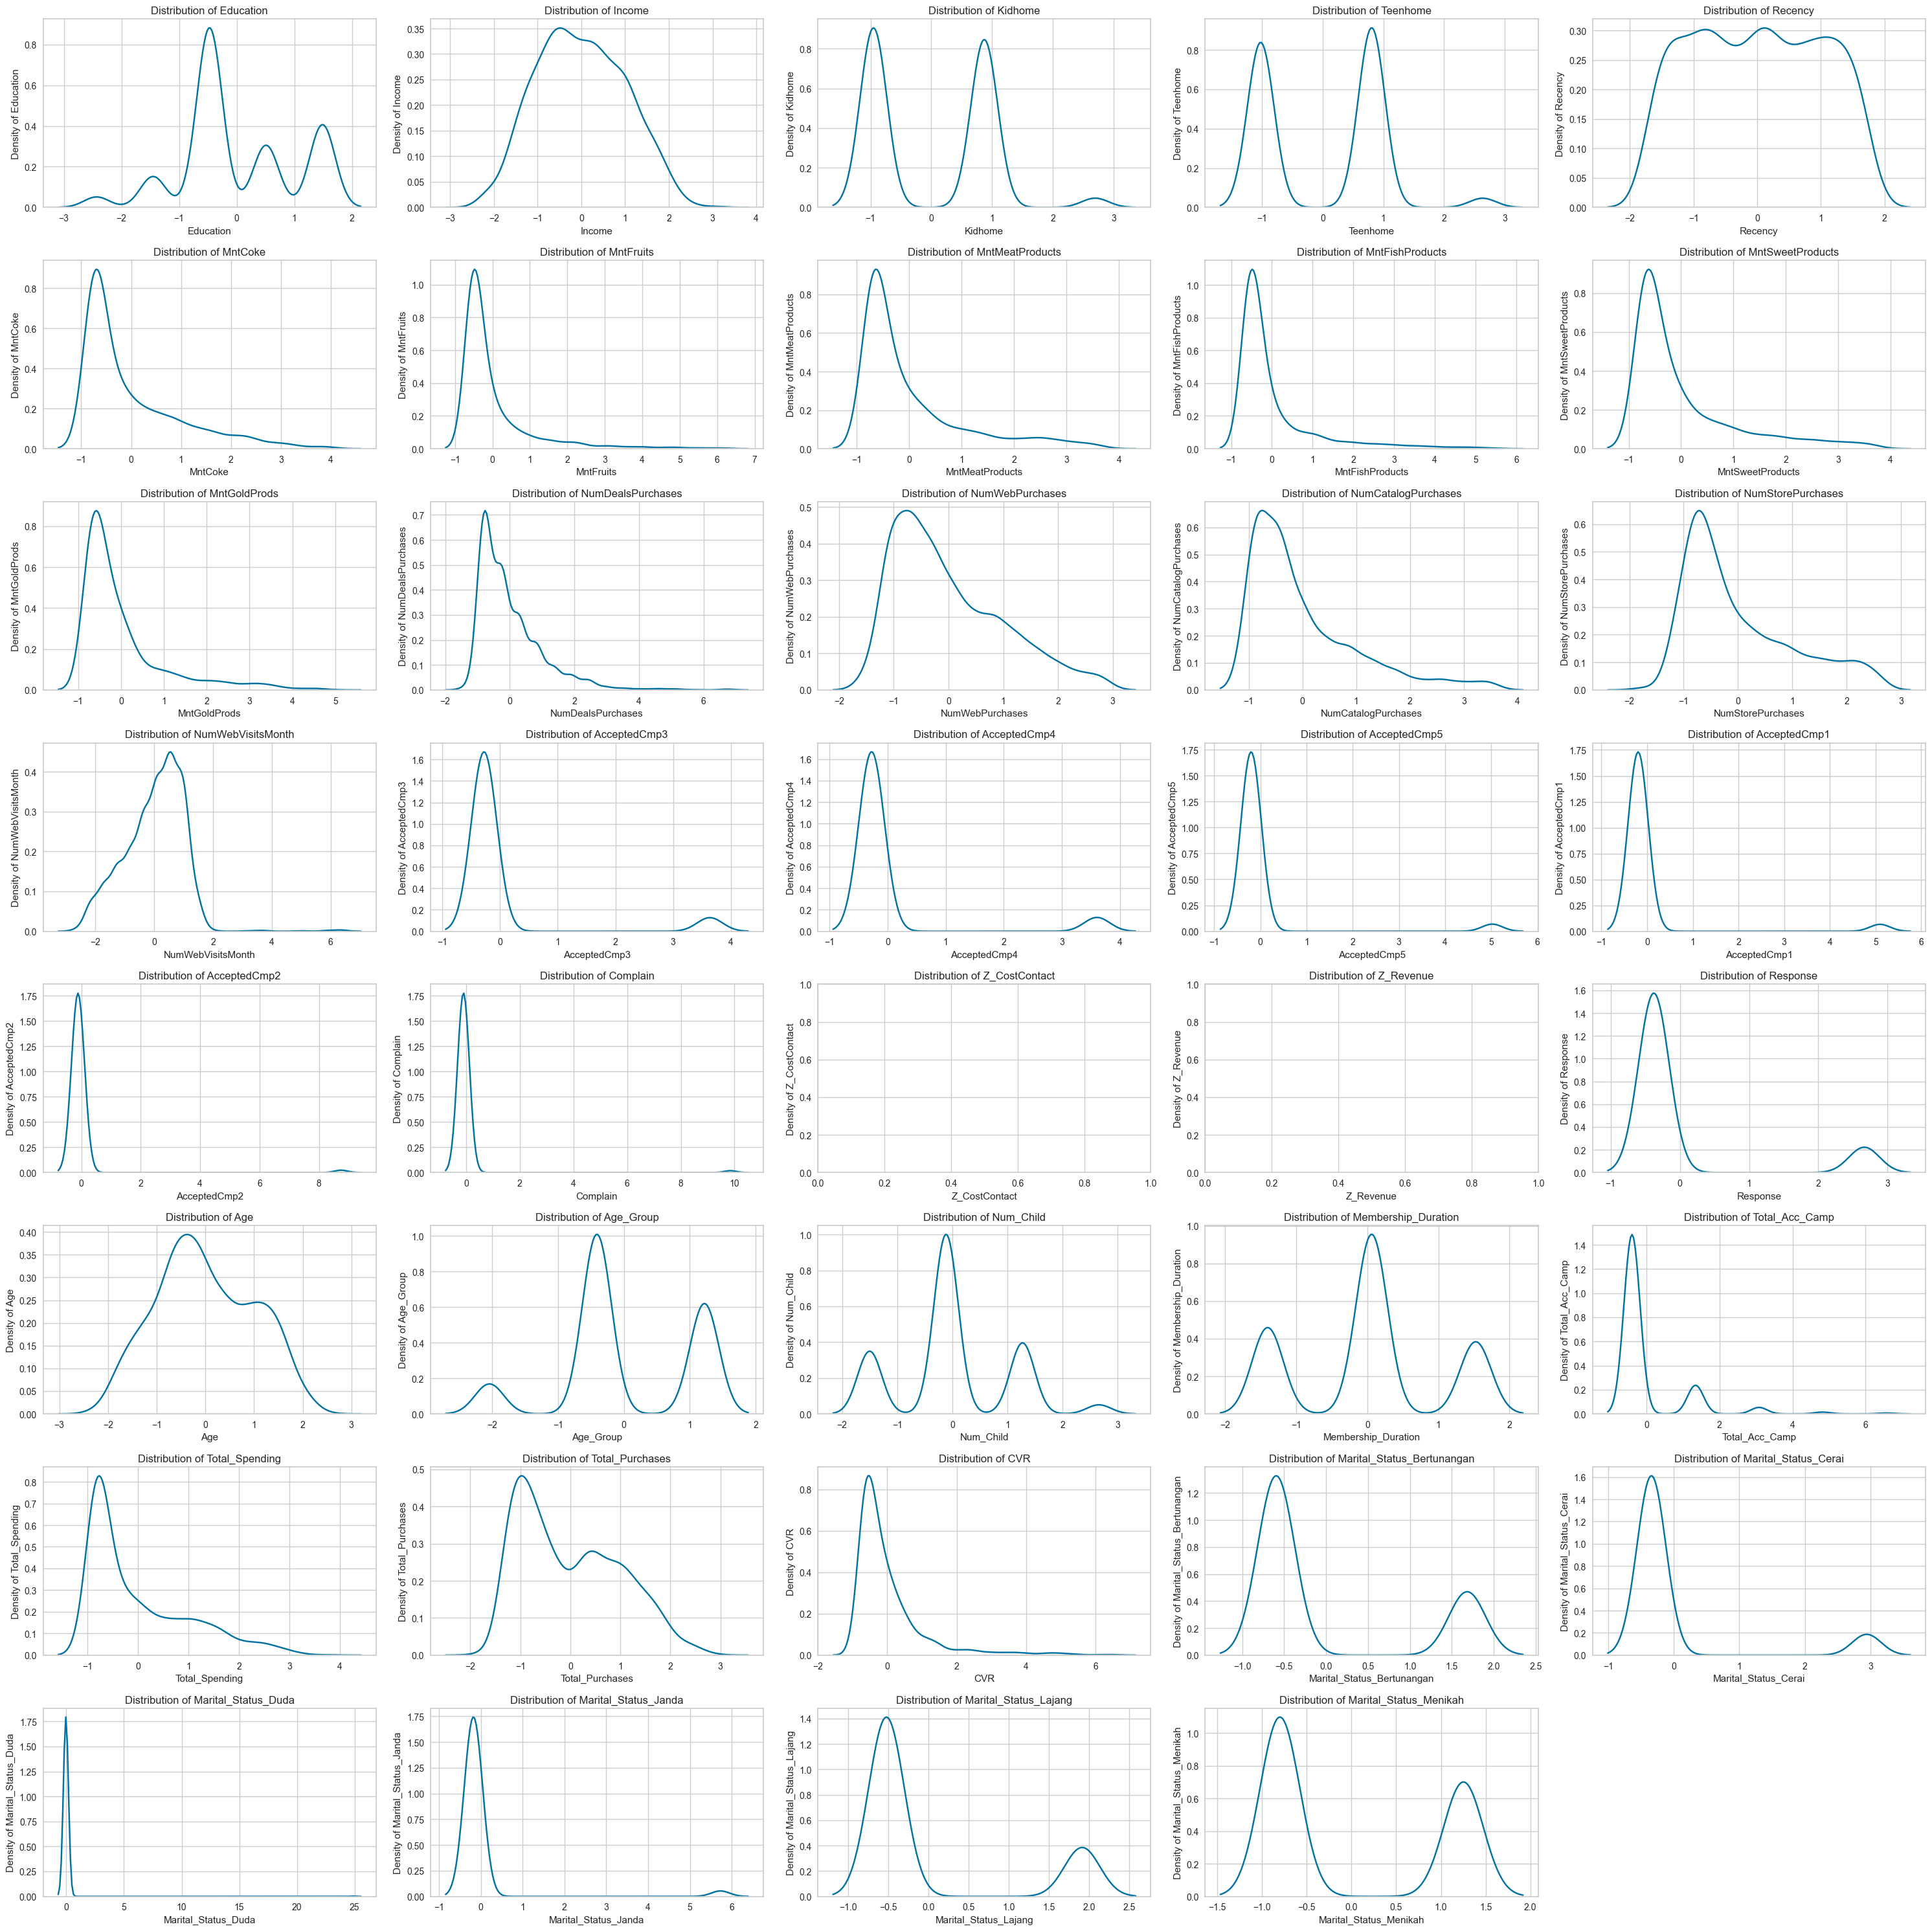

In [589]:
#Kdeplot after scaling
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(30,30))
axes = axes.flatten()

for i in range(len(df_preprocessed.columns)) :
    sns.kdeplot(data = df_preprocessed, ax=axes[i], x=df_preprocessed.columns[i])
    axes[i].set_title(f'Distribution of {df_preprocessed.columns[i]}')
    axes[i].set_ylabel(f'Density of {df_preprocessed.columns[i]}')
    axes[i].set_xlabel(f'{df_preprocessed.columns[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_preprocessed.columns) < len(axes):
    axes[len(df_preprocessed.columns)].remove()

plt.tight_layout()
plt.show()

# **Task 3 : Clustering With K-means**

In [590]:
# Make copy of dataframe
df_model = df_preprocessed.copy()

## PCA

Because we have so many features, we will need to reduce them without throwing information away using PCA.

In [591]:
from sklearn.decomposition import PCA 

# Fit pca
pca = PCA(n_components = 2)
pca.fit(df_model)

# Transform data 
data_pca = pca.transform(df_model)
df_pca = pd.DataFrame(data_pca, columns = ['PC 1', 'PC 2'])

In [592]:
df_pca

PC 1      PC 2
0    -2.587152 -0.998085
1     3.024975  1.310719
2    -2.761262  1.390047
3     0.644242  0.418661
4     2.154105 -0.732261
...        ...       ...
1856 -3.164284  1.251350
1857  0.425386 -4.400509
1858  3.170721  1.312006
1859  3.687071 -0.933910
1860 -1.314482 -2.478259

[1861 rows x 2 columns]

## Finding Optimal Cluster Using Elbow Method and Silhouette Score

Text(0.5, 0, 'Number of Cluster')

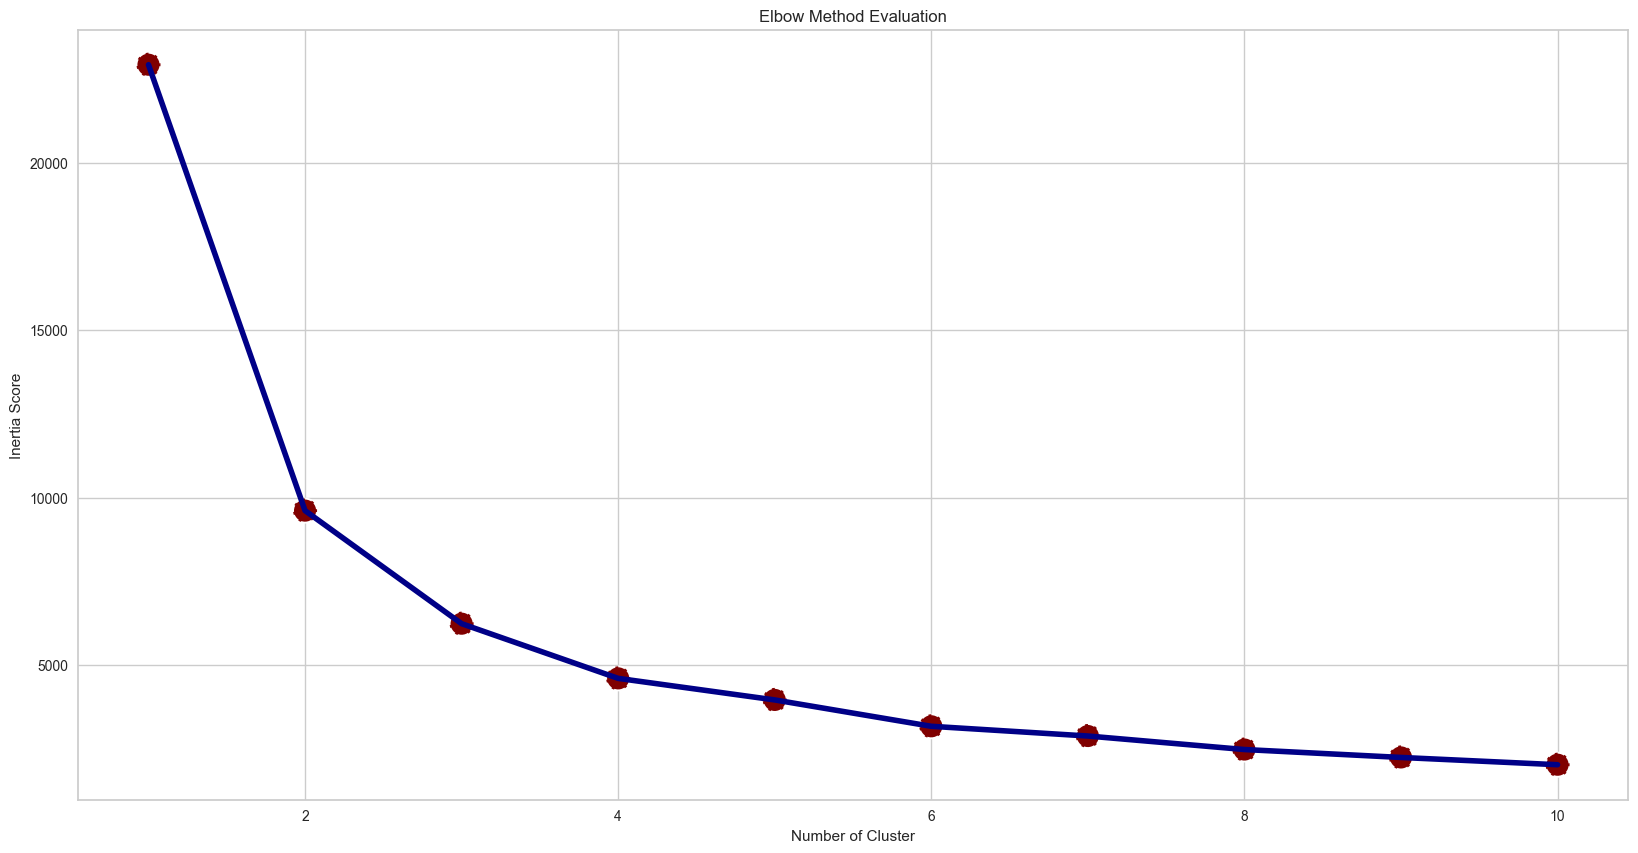

In [593]:
# Elbow method
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')

plt.title('Elbow Method Evaluation')
plt.ylabel('Inertia Score')
plt.xlabel('Number of Cluster')

In [594]:
#List of inertias
df_inertia = pd.DataFrame(inertia)
df_inertia

0
0  22916.944640
1   9615.882683
2   6243.282798
3   4611.746622
4   3969.020010
5   3182.394354
6   2892.407642
7   2489.271731
8   2253.149825
9   2036.232417

In [595]:
# Inertia reduction by cluster in percentage
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    58.040294
1    35.073222
2    26.132665
3    13.936729
4    19.819141
5     9.112218
6    13.937728
7     9.485582
8     9.627296
9          NaN
dtype: float64

In [596]:
?KElbowVisualizer

Init signature:
KElbowVisualizer(
    estimator,
    ax=None,
    k=10,
    metric='distortion',
    distance_metric='euclidean',
    timings=True,
    locate_elbow=True,
    **kwargs,
)
Docstring:     
The K-Elbow Visualizer implements the "elbow" method of selecting the
optimal number of clusters for K-means clustering. K-means is a simple
unsupervised machine learning algorithm that groups data into a specified
number (k) of clusters. Because the user must specify in advance what k to
choose, the algorithm is somewhat naive -- it assigns all members to k
clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of
values for k (say from 1-10) and then for each value of k computes an
average score for all clusters. By default, the ``distortion`` score is
computed, the sum of square distances from each point to its assigned
center. Other metrics can also be used such as the ``silhouette`` score,
the mean silhouette c

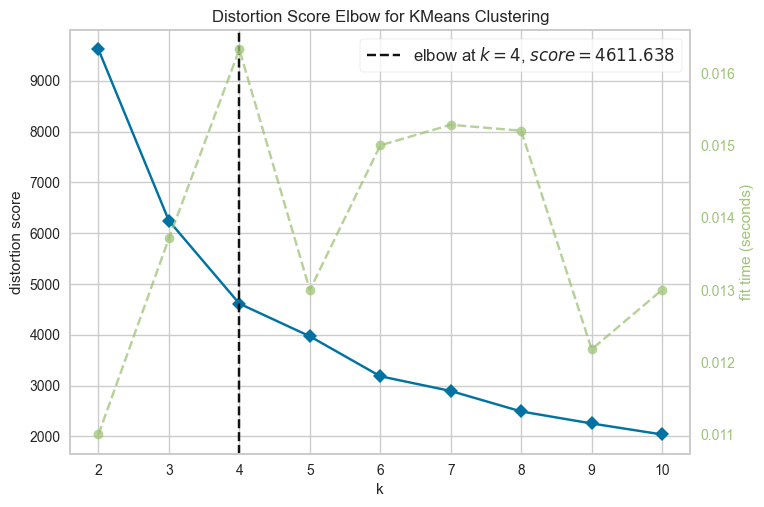

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [597]:
# Visualization with parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model
model = KMeans(random_state=42)

# Initialize the KElbowVisualizer with the KMeans model
kev = KElbowVisualizer(model, metric='distortion', timings=True, locate_elbow=True)

# Fit the visualizer to the data
kev.fit(df_pca)

# Visualize the elbow plot
kev.show()

In [598]:
kev.elbow_score_

4611.638199081707

In [599]:
kev.elbow_value_

4

> Based on elbow method inertia value, the optimal number of cluster is 4.

**Additional Information About Distortion Score**

> Note : I just learned that distortion score is actually the same with inertia.

The distortion score, also known as inertia in the context of K-means clustering, is a metric that measures the sum of squared distances between each data point and its nearest centroid. It reflects how compact the clusters are, with lower values indicating tighter, more cohesive clusters.

Here's how the distortion score can be used to determine the appropriate number of clusters:

1. **Elbow Method**: One common approach is the "Elbow Method." In this method, you plot the distortion scores for different numbers of clusters and look for the point where the rate of decrease in distortion begins to slow down (forming an "elbow" shape). This point is often considered a good estimate for the optimal number of clusters.

2. **Optimal Number of Clusters**: The rationale behind the Elbow Method is that as you increase the number of clusters, the distortion score tends to decrease because the centroids are closer to individual data points. However, beyond a certain point, adding more clusters may only marginally reduce the distortion score as the improvement in compactness diminishes. The "elbow" point represents the trade-off between minimizing distortion and avoiding overly complex models.

3. **Interpretation**: It's important to interpret the Elbow Method results cautiously. Sometimes, the "elbow" point may not be clearly defined, or there may be multiple potential elbow points. In such cases, domain knowledge, visual inspection of clustering results, and consideration of other metrics (such as silhouette score) can provide additional insights into choosing the optimal number of clusters.

In summary, the distortion score (inertia) is a useful metric for evaluating the quality of K-means clustering and determining the appropriate number of clusters. By observing how the distortion score changes with the number of clusters and identifying the "elbow" point, you can make an informed decision about the optimal clustering solution for your data.

## Clustering Process Using K-means

In [603]:
# Fit cluster into our scaled dataframe
kmeans = KMeans(n_clusters=4, random_state = 42)
kmeans.fit(df_pca.values)

KMeans(n_clusters=4, random_state=42)

In [604]:
# Assign the cluster to our original dataframe and scaled dataframe
df_pca['Clusters'] = kmeans.labels_
df_filtered_outliers['Clusters'] = kmeans.labels_

Text(0.5, 1.0, 'Cluster Segmentation')

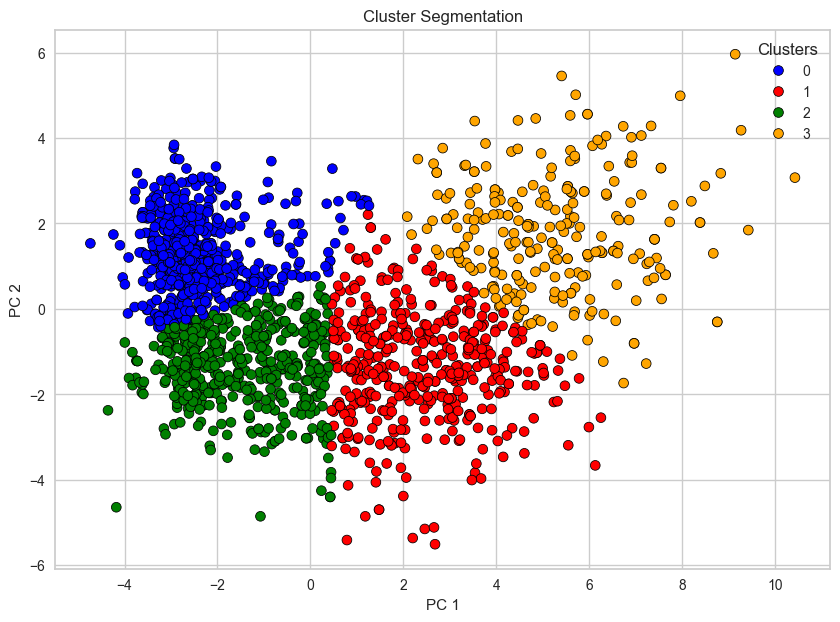

In [605]:
# Segmentation visualization (4 cluster)
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(data = df_pca, x='PC 1', y='PC 2', edgecolor='black', hue='Clusters', palette=['blue','red','green','orange'])
plt.title('Cluster Segmentation')

## Model Evaluation

In [606]:
# Visualize silhouette score in heatmap
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='coolwarm')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

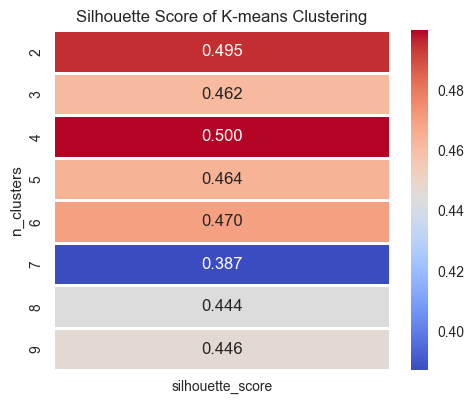

In [607]:
visualize_silhouette_layer(df_pca)

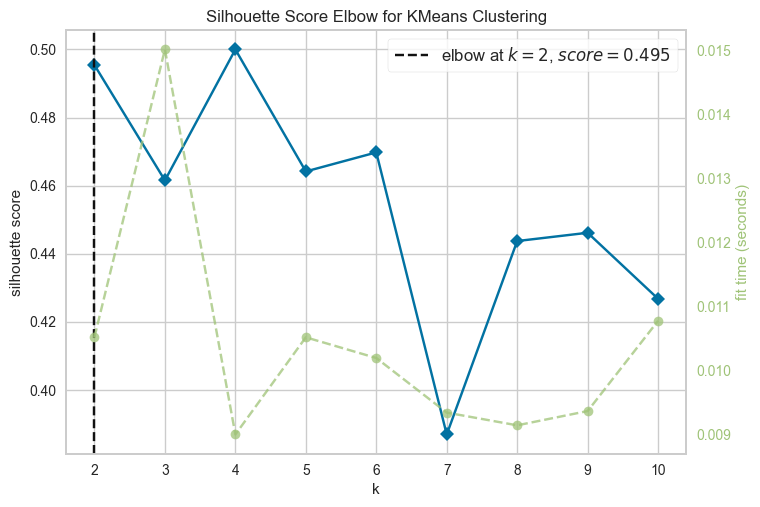

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [618]:
# Visualization with silhouette score
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model
model = KMeans(random_state=42)

# Initialize the KElbowVisualizer with the KMeans model
kev = KElbowVisualizer(model, metric='silhouette', distance_metric='euclidean', timings=True, locate_elbow=True)

# Fit the visualizer to the data
kev.fit(df_pca)

# Visualize the elbow plot
kev.show()

The locate_elbow parameter got it wrong here, the optimal cluster in the graph should be 4 with the highest silhouette score.

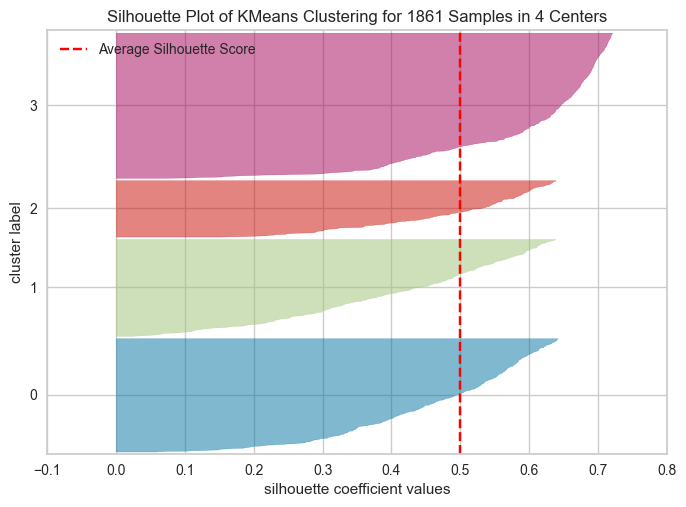

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1861 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [616]:
#Silhouetter plot (4 cluster)
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_pca)        # Fit the data to the visualizer
visualizer.show()             # Finalize and render the figure

**Major Findings:**

- Based on the Silhouette Score, the recommended optimal number of clusters is 4.
- The Silhouette Score for this number of clusters is higher compared to other numbers of clusters, indicating better clustering quality. Silhouette Score is an evaluation metric that describes how well objects within one cluster are grouped within their own data compared to other clusters. The higher the Silhouette Score, the better the separation of clusters.

# Cluster Interpretation and Business Recommendation

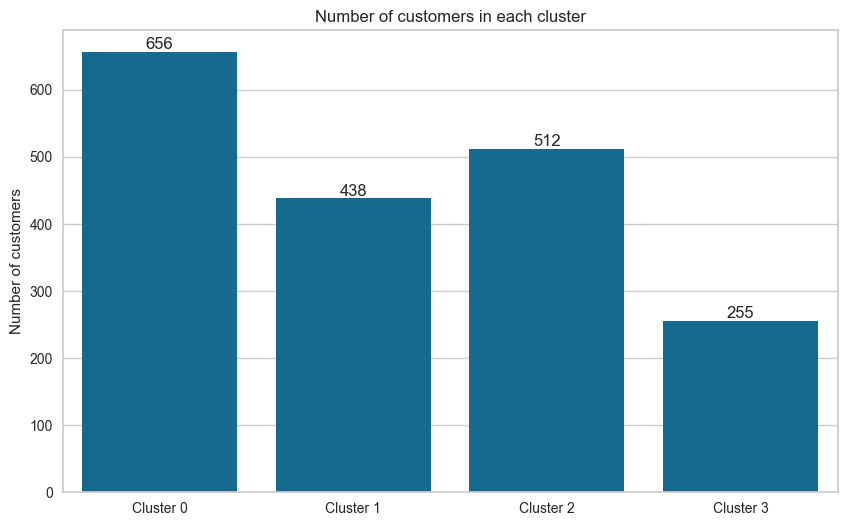

In [608]:
# Check count of each clusters

plt.figure(figsize=(10,6))
ax = sns.countplot(x = df_filtered_outliers['Clusters'])
ax.bar_label(ax.containers[0])  #to display count
plt.xticks([0, 1, 2, 3], ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title("Number of customers in each cluster")
plt.xlabel("")
plt.ylabel("Number of customers")
plt.show()

In [609]:
# See original dataframe grouped with cluster aggregated by mean and median
summary_feature = ['Income', 'Age', 'Recency', 'Total_Spending', 'Total_Purchases', 'CVR', 'Clusters']
summary_feature_exc_cluster = ['Income', 'Age', 'Recency', 'Total_Spending', 'Total_Purchases', 'CVR']

result = round(df_filtered_outliers[summary_feature].groupby('Clusters').agg(['mean', 'median']), 2)

# Display the result
display(result)

Income                Age        Recency        Total_Spending  \
                 mean      median   mean median    mean median           mean   
Clusters                                                                        
0         30850664.63  30431500.0  47.04   47.0   49.12   48.0       88778.96   
1         60374070.78  60529000.0  60.44   61.0   48.57   49.0      816116.44   
2         43200811.52  44064500.0  60.79   61.0   48.64   49.5      182279.30   
3         73171756.86  73691000.0  54.56   54.0   47.78   49.0     1221211.76   

                    Total_Purchases          CVR         
             median            mean median  mean median  
Clusters                                                 
0           57000.0            7.27    7.0  1.24    1.0  
1          757500.0           21.73   22.0  4.52    4.0  
2          140000.0           11.17   10.0  1.88    1.8  
3         1180000.0           20.55   20.0  9.25    8.0

In [610]:
df_cluster_interpret = df_filtered_outliers[summary_feature]

In [611]:
df_cluster_interpret

Income  Age  Recency  Total_Spending  Total_Purchases   CVR  \
1     46344000.0   70       38           27000                6  1.20   
2     71613000.0   59       26          776000               21  5.25   
3     26646000.0   40       26           53000                8  1.33   
4     58293000.0   43       94          422000               19  3.80   
5     62513000.0   57       16          716000               22  3.67   
...          ...  ...      ...             ...              ...   ...   
2234  34421000.0   50       81           30000                4  0.57   
2236  64014000.0   78       56          444000               22  3.14   
2237  56981000.0   43       91         1241000               19  3.17   
2238  69245000.0   68        8          843000               23  7.67   
2239  52869000.0   70       40          172000               11  1.57   

      Clusters  
1            2  
2            3  
3            0  
4            1  
5            1  
...        ...  
2234         0  
2236         2  
2237         3  
2238         1  
2239         2  

[1861 rows x 7 columns]

In [612]:
?set

Init signature: set(self, /, *args, **kwargs)
Docstring:     
set() -> new empty set object
set(iterable) -> new set object

Build an unordered collection of unique elements.
Type:           type
Subclasses:     LazySet, LazySet, LazySet, _UniqueDirs

In [613]:
df_cluster_interpret

Income  Age  Recency  Total_Spending  Total_Purchases   CVR  \
1     46344000.0   70       38           27000                6  1.20   
2     71613000.0   59       26          776000               21  5.25   
3     26646000.0   40       26           53000                8  1.33   
4     58293000.0   43       94          422000               19  3.80   
5     62513000.0   57       16          716000               22  3.67   
...          ...  ...      ...             ...              ...   ...   
2234  34421000.0   50       81           30000                4  0.57   
2236  64014000.0   78       56          444000               22  3.14   
2237  56981000.0   43       91         1241000               19  3.17   
2238  69245000.0   68        8          843000               23  7.67   
2239  52869000.0   70       40          172000               11  1.57   

      Clusters  
1            2  
2            3  
3            0  
4            1  
5            1  
...        ...  
2234         0  
2236         2  
2237         3  
2238         1  
2239         2  

[1861 rows x 7 columns]

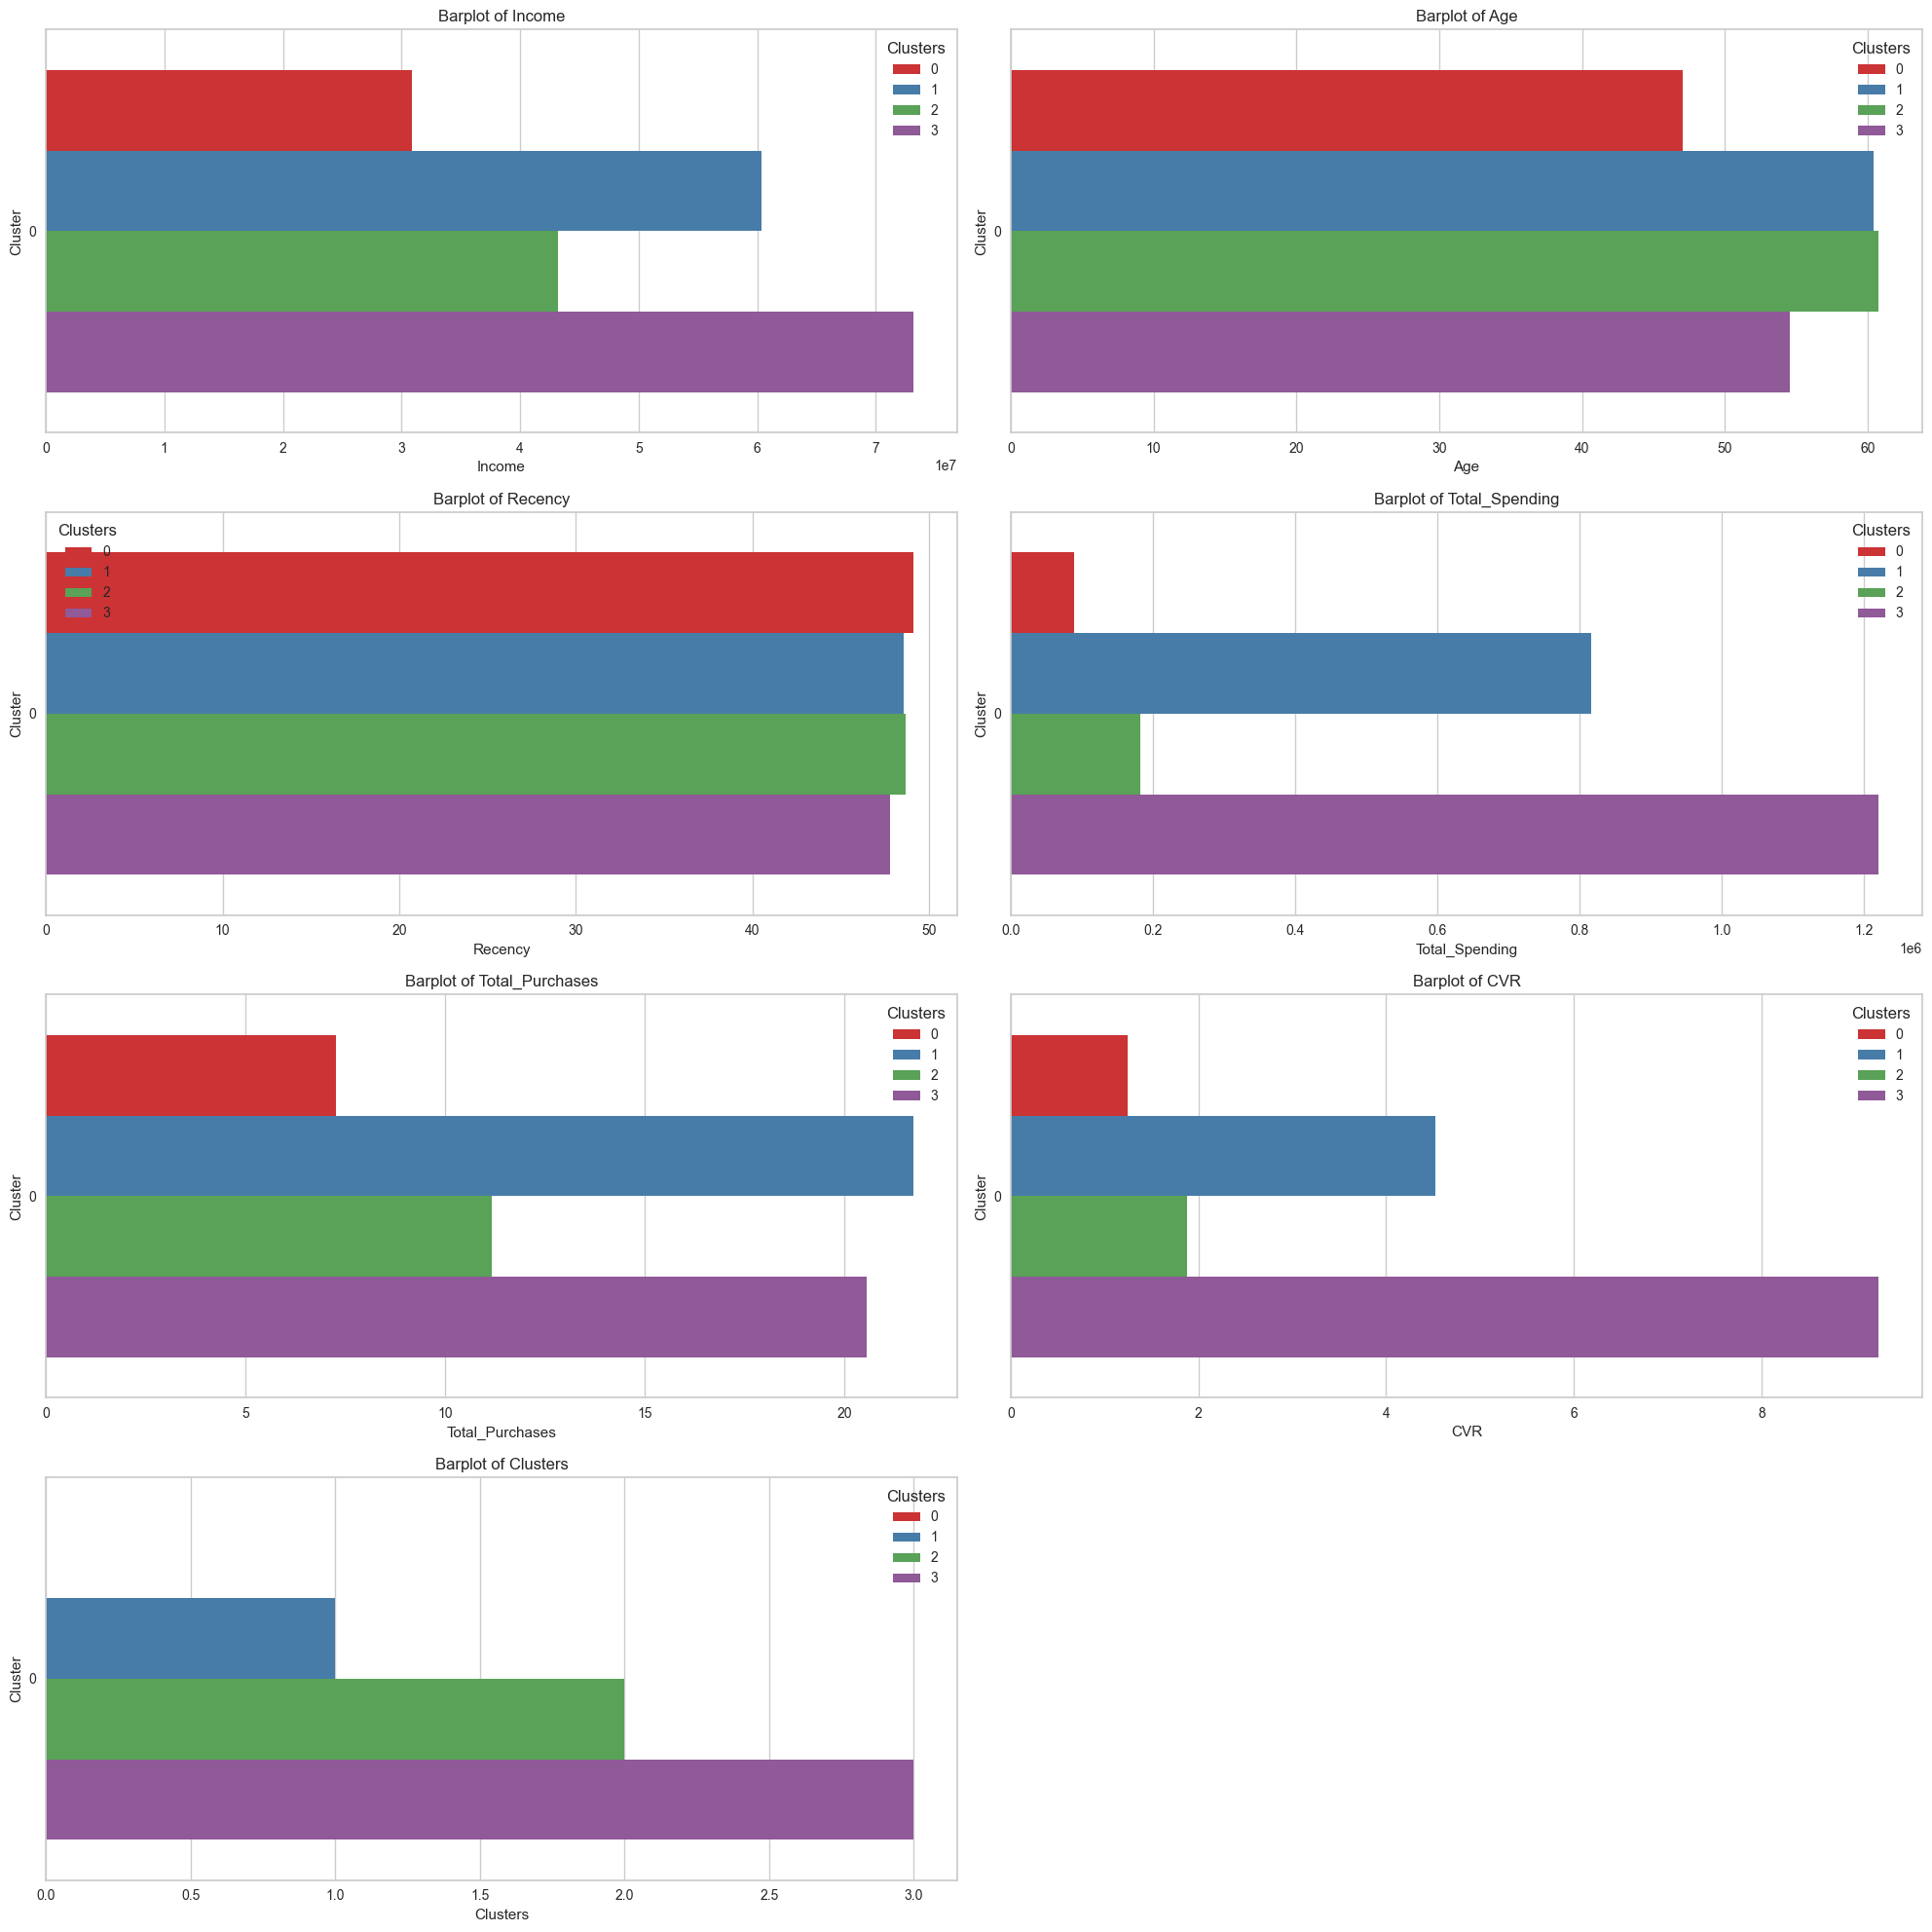

In [614]:
# Hisplot with kde
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
ax = ax.flatten()


for i in range(len(summary_feature)):
    sns.barplot(data=df_cluster_interpret, ax=ax[i], x=summary_feature[i], hue='Clusters', ci=False, palette='Set1')
    ax[i].set_title(f'Barplot of {summary_feature[i]}')
    ax[i].set_ylabel('Cluster')
    ax[i].set_yticklabels(['0', '1', '2', '3'])
    ax[i].set_xlabel(f'{summary_feature[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df_cluster_interpret.columns) < len(ax):
    ax[len(df_cluster_interpret.columns)].remove()

plt.tight_layout()
plt.show()
